In [777]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [778]:
df = pd.read_csv(r'weather.csv')

In [779]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416937 entries, 0 to 416936
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    416937 non-null  object        
 1   state      416937 non-null  object        
 2   latitude   416937 non-null  float64       
 3   longitude  416937 non-null  float64       
 4   elevation  416937 non-null  float64       
 5   date       416937 non-null  datetime64[ns]
 6   TMIN       415593 non-null  float64       
 7   TMAX       415664 non-null  float64       
 8   TAVG       259038 non-null  float64       
 9   AWND       234880 non-null  float64       
 10  WDF5       226115 non-null  float64       
 11  WSF5       226175 non-null  float64       
 12  SNOW       135109 non-null  float64       
 13  SNWD       312442 non-null  float64       
 14  PRCP       414965 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 47.7+ MB


In [781]:
df.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,2017-03-12,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,2017-04-04,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,2017-04-20,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,2017-01-20,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,2017-02-17,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0


station does not have any record

In [782]:
columns_to_check = ['TMIN', 'TMAX', 'TAVG', 'AWND', 'WDF5', 'WSF5', 'SNOW', 'SNWD', 'PRCP']

stations_with_nulls = df[df[columns_to_check].isnull().all(axis=1)]['station']
print(stations_with_nulls)

234299    KILLDEER
Name: station, dtype: object


In [783]:
x = df.loc[df['station'] == 'KILLDEER']
print(x.shape)
df = df.drop(x.index)

(263, 15)


# Wind

AWND = Average daily wind speed (tenths of meters per second)

In [784]:
print('mean= ', df['AWND'].mean())
print('median= ', df['AWND'].median())
print('std= ', df['AWND'].std())
print('max= ', df['AWND'].max())
print('min= ', df['AWND'].min())

mean=  8.1420311261921
median=  6.934514
std=  6.746945858657427
max=  112.518082
min=  0.0


data is centralized

states did not record any of AWND and WSF5 -> drop records of these states

In [785]:
non_null_count = df.groupby('state')['AWND'].count()
zeros = non_null_count[non_null_count == 0]
print(zeros)
non_null_count = df.groupby('state')['WSF5'].count()
zeros = non_null_count[non_null_count == 0]
print(zeros)

state
AB    0
BC    0
MB    0
NB    0
NL    0
NS    0
NT    0
ON    0
PE    0
QC    0
Name: AWND, dtype: int64
state
AB    0
BC    0
MB    0
NB    0
NL    0
NS    0
NT    0
ON    0
PE    0
QC    0
Name: WSF5, dtype: int64


In [786]:
state = ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'ON', 'PE', 'QC']

In [787]:
df = df[~df['state'].isin(state)]

In [788]:
x = df.loc[df['AWND'] >= df['WSF5']]
x.shape
df = df.drop(x.index)

In [789]:
top_10 = non_null_count.nlargest(10)
top_10

state
CA    17770
TX    14719
FL     9924
AK     9856
NY     7503
WA     7008
MI     6993
OH     6231
PA     5708
CO     5455
Name: WSF5, dtype: int64

In [790]:
top_ten_states = ['CA', 'TX', 'FL', 'AK', 'WA', 'NY', 'MI', 'OH', 'OR', 'PA']

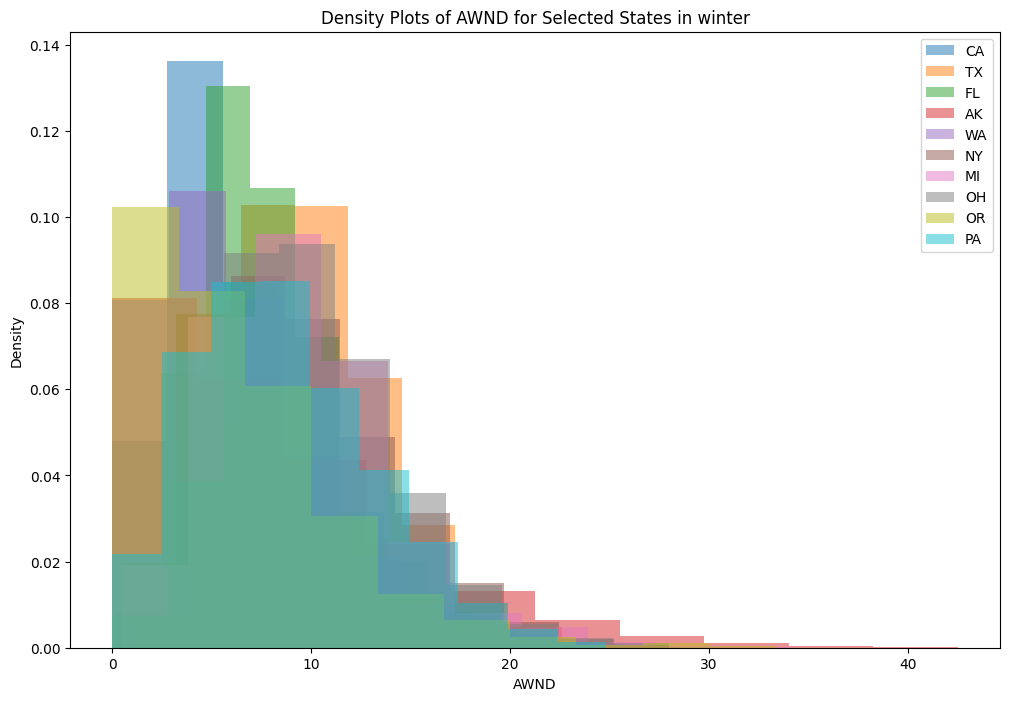

In [791]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([1,2,3])) &(df['state'] == state)]
    plt.hist(filtered_df['AWND'], density=True, alpha=0.5, label=state)

plt.xlabel('AWND')
plt.ylabel('Density')
plt.title('Density Plots of AWND for Selected States in winter')
plt.legend()
plt.show()

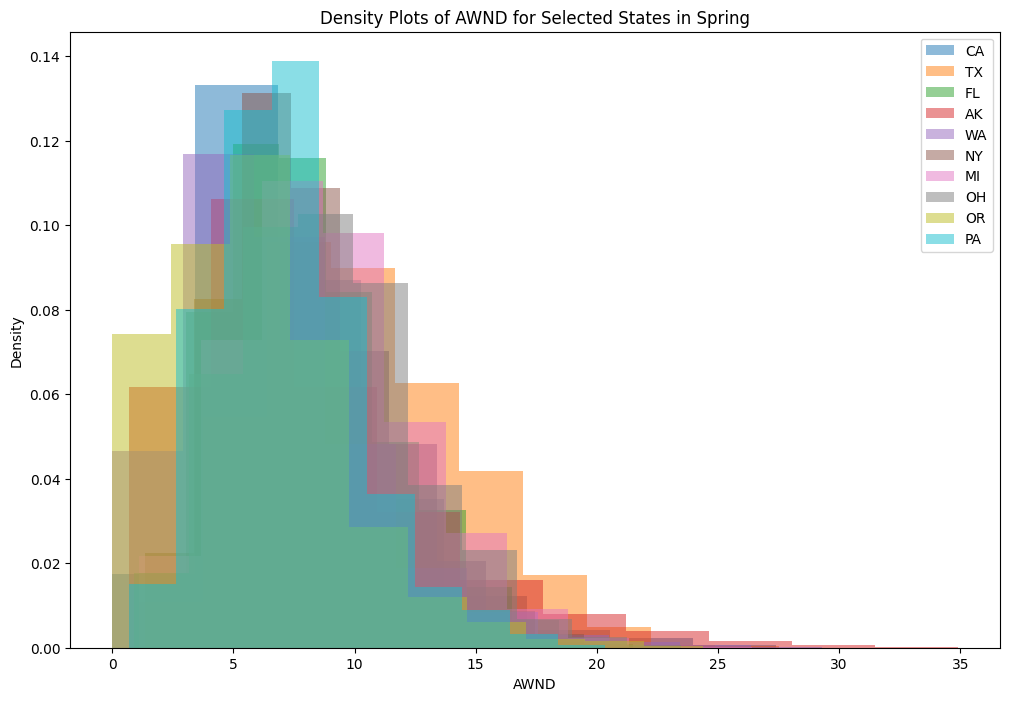

In [792]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([4,5,6])) &(df['state'] == state)]
    plt.hist(filtered_df['AWND'], density=True, alpha=0.5, label=state)

plt.xlabel('AWND')
plt.ylabel('Density')
plt.title('Density Plots of AWND for Selected States in Spring')
plt.legend()
plt.show()

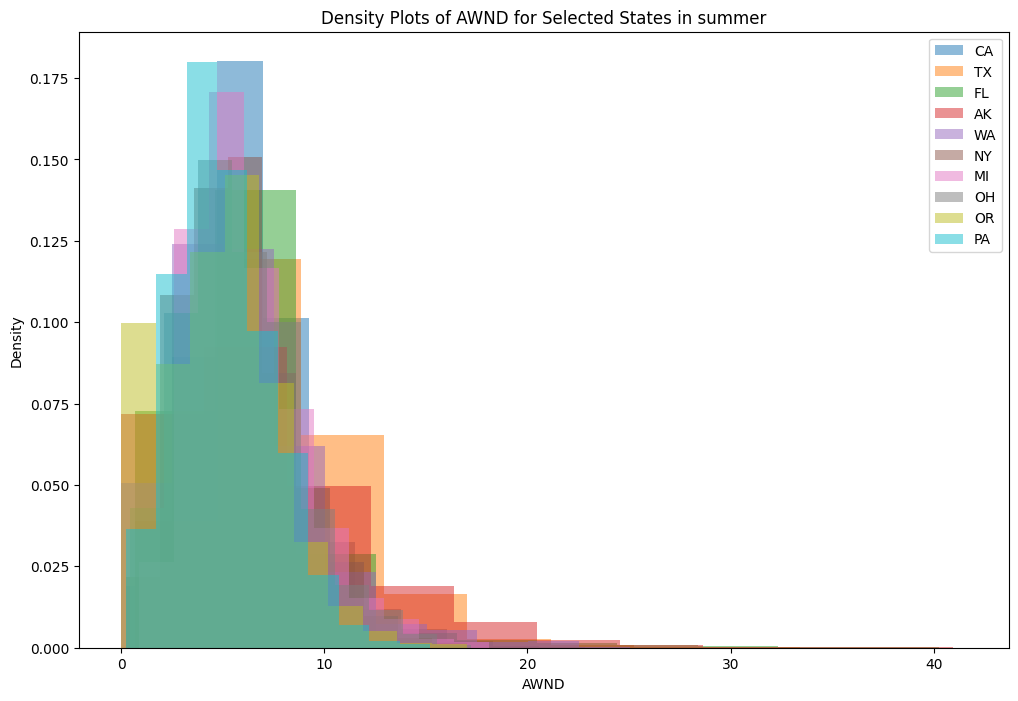

In [793]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([7,8,9])) &(df['state'] == state)]
    plt.hist(filtered_df['AWND'], density=True, alpha=0.5, label=state)

plt.xlabel('AWND')
plt.ylabel('Density')
plt.title('Density Plots of AWND for Selected States in summer')
plt.legend()
plt.show()

data is centralized within a state -> fill null values with mean of AWND state within a season

drop outleirs of AWND state within a season

In [794]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410337 entries, 0 to 416936
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    410337 non-null  object        
 1   state      410337 non-null  object        
 2   latitude   410337 non-null  float64       
 3   longitude  410337 non-null  float64       
 4   elevation  410337 non-null  float64       
 5   date       410337 non-null  datetime64[ns]
 6   TMIN       409042 non-null  float64       
 7   TMAX       409089 non-null  float64       
 8   TAVG       252773 non-null  float64       
 9   AWND       234879 non-null  float64       
 10  WDF5       226114 non-null  float64       
 11  WSF5       226174 non-null  float64       
 12  SNOW       128525 non-null  float64       
 13  SNWD       310060 non-null  float64       
 14  PRCP       408373 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 50.1+ MB


In [795]:
lis = []
states = df['state'].unique()
outlier_df = pd.DataFrame()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['AWND'].notnull())]
        iqr = rows_with_criteria['AWND'].quantile(0.75) - rows_with_criteria['AWND'].quantile(0.25)
        lower_threshold = rows_with_criteria['AWND'].quantile(0.25) - 1.5 * iqr
        upper_threshold = rows_with_criteria['AWND'].quantile(0.75) + 1.5 * iqr
        outliers = rows_with_criteria[(rows_with_criteria['AWND'] < lower_threshold) | (rows_with_criteria['AWND'] > upper_threshold)]
        result = pd.concat([result, outliers, outliers]).drop_duplicates(keep=False)

In [796]:
df = result   

In [797]:
result = pd.concat([df, outlier_df, outlier_df]).drop_duplicates(keep=False)

In [798]:
df = result

Missing values

In [799]:
null_rows = df[df['AWND'].isnull()]
null_rows.shape

(0, 15)

AVG of AWND within a seson within a state to fill missing values in a list

In [800]:
lis = []
states = df['state'].unique()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['AWND'].notnull())]
        record = [state, rows_with_criteria['AWND'].mean()]
        lis.append(record)

AWND in season per state in an ordered dataframe

In [801]:
new_df = pd.DataFrame(lis, columns=['state', 'AWND'])

combined_df = new_df.groupby('state').agg({'AWND': list}).reset_index()

combined_df.set_index('state', inplace=True)

AWND_state_season = combined_df['AWND'].apply(pd.Series)

AWND_state_season.rename(columns={0: 'winter', 1: 'spring', 2: 'summer'}, inplace=True)
AWND_state_season.shape

(54, 3)

fill missing values of AWND with mean

In [802]:
def fill_null(row):
    if pd.isnull(row['AWND']):
        if row['date'].month in [1, 2, 3]:
            return AWND_state_season.loc[row.state, 'winter']
        elif row['date'].month in [4, 5, 6]:
            return AWND_state_season.loc[row.state, 'spring']
        else:
            return AWND_state_season.loc[row.state, 'summer']
    else:
        return row['AWND']

df['AWND'] = df.apply(fill_null, axis=1)

In [803]:
null_rows = df[df['AWND'].isnull()]
null_rows.shape

(0, 15)

# WSF5

WSF5 = Fastest 5-second wind speed (tenths of meters per second)

In [804]:
print('mean =', df['WSF5'].mean())
print('median =', df['WSF5'].median())
print('std =', df['WSF5'].std())
print('max= ', df['WSF5'].max())
print('min= ', df['WSF5'].min())

mean = 16.52858384917613
median = 14.092722
std = 10.770095924319081
max=  170.00744
min=  3.6077977329842934


data is centralized

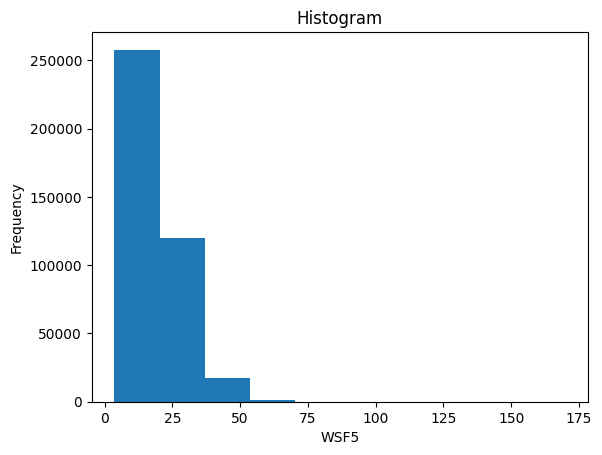

In [805]:
df['WSF5'].plot(kind='hist')
plt.xlabel('WSF5')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [806]:
x = df.loc[df['AWND'] >= df['WSF5']]
x.shape
df = df.drop(x.index)

avg speed can't be larger then the fastest speed -> drop

In [807]:
lis = []
states = df['state'].unique()
outlier_df = pd.DataFrame()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['WSF5'].notnull())]
        iqr = rows_with_criteria['WSF5'].quantile(0.75) - rows_with_criteria['WSF5'].quantile(0.25)
        lower_threshold = rows_with_criteria['WSF5'].quantile(0.25) - 1.5 * iqr
        upper_threshold = rows_with_criteria['WSF5'].quantile(0.75) + 1.75 * iqr
        outliers = rows_with_criteria[(rows_with_criteria['WSF5'] < lower_threshold) | (rows_with_criteria['WSF5'] > upper_threshold)]
        result = pd.concat([result, outliers, outliers]).drop_duplicates(keep=False)

outliers of WSF5 within a season in state

1.75 not 1.5, because the values of rows_with_criteria['WSF5'].quantile(0.75) + 1.5 * iqr  was too small and removed most of non zero values

In [808]:
df = result

In [809]:
non_null_count = df.groupby('state')['WSF5'].count()

In [810]:
top_10 = non_null_count.nlargest(10)
top_10

state
UT    31111
MT    26955
OR    25550
CA    25294
WY    23226
WA    23045
CO    22538
ID    21157
AK    17534
TX    14349
Name: WSF5, dtype: int64

In [811]:
top_ten_states = ['CA', 'TX', 'FL', 'AK', 'WA', 'NY', 'MI', 'KS', 'PA', 'OH']

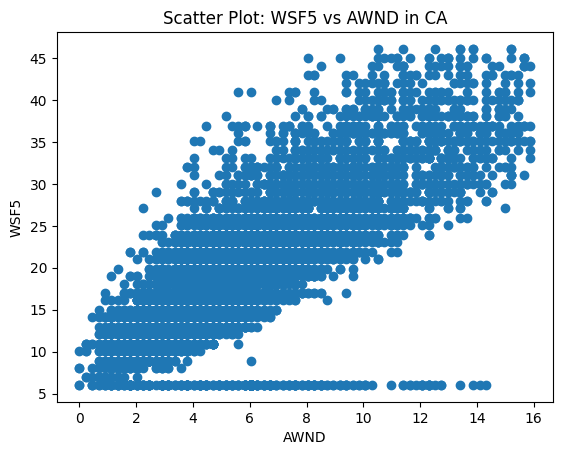

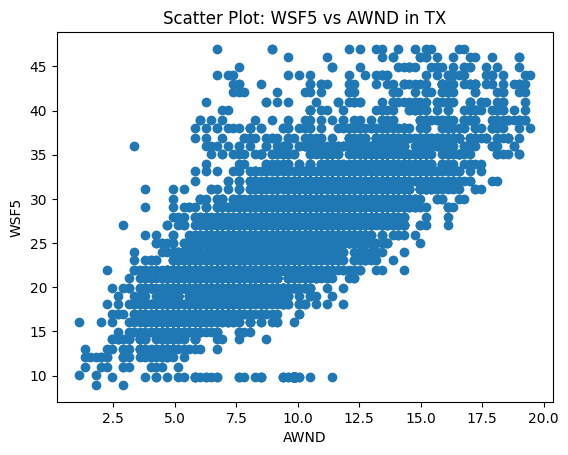

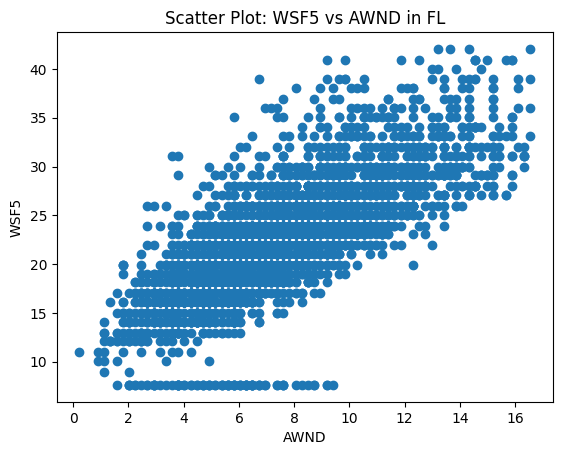

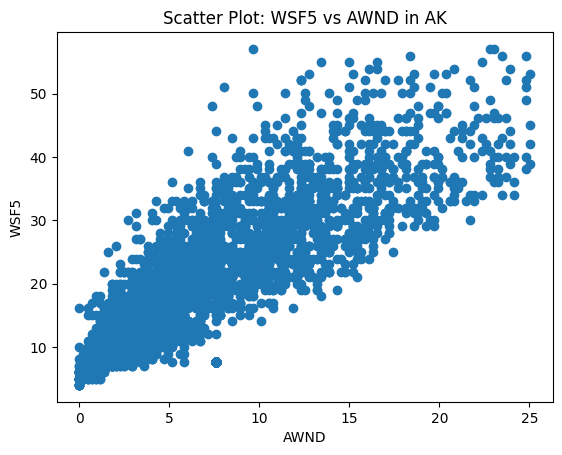

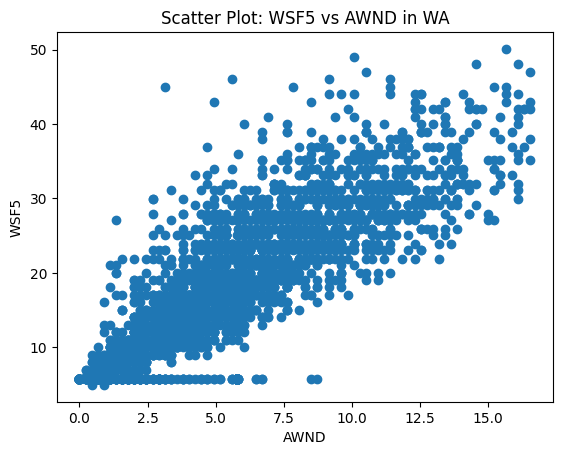

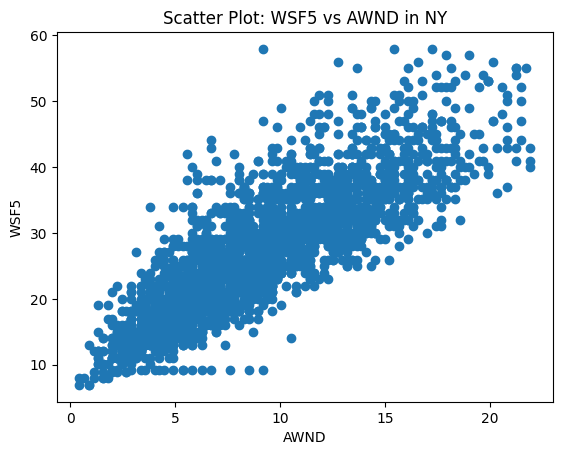

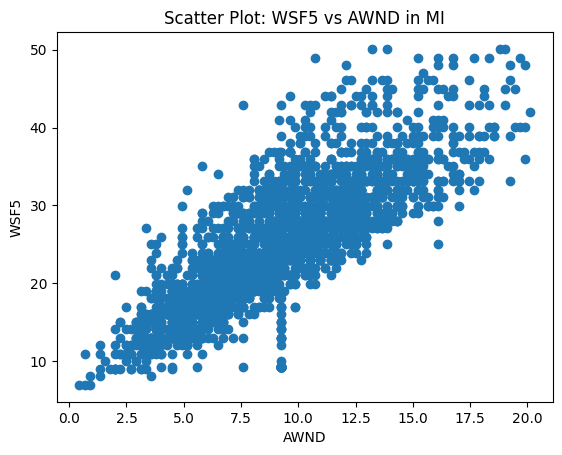

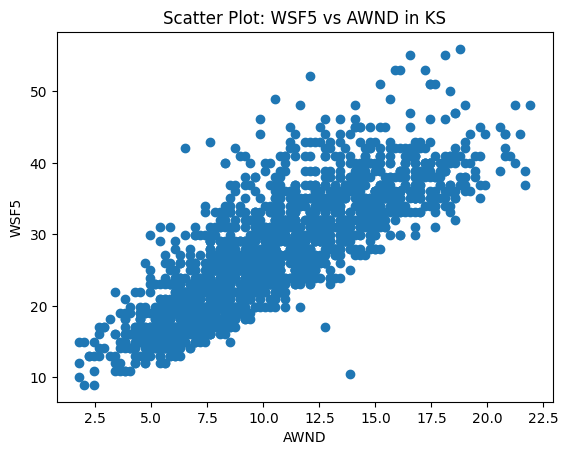

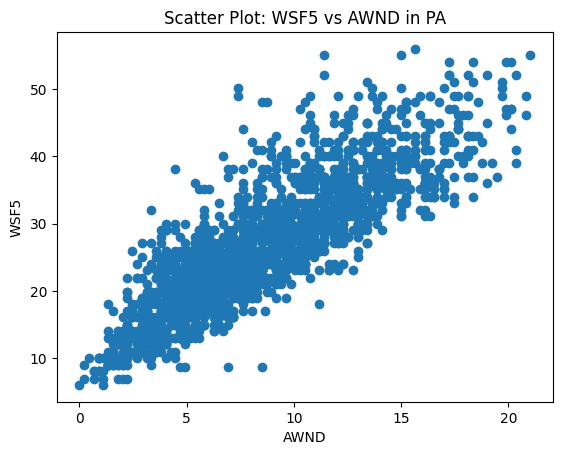

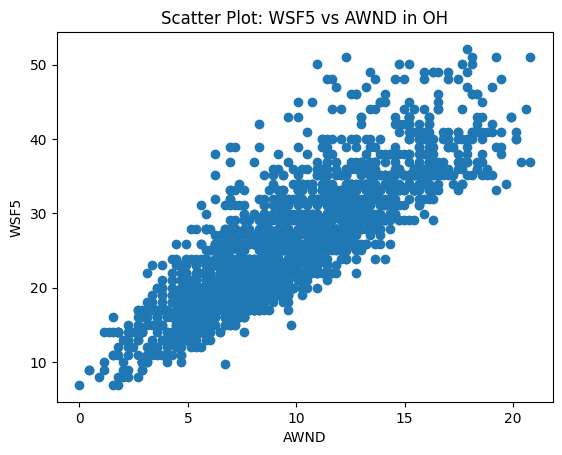

In [812]:
for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([1,2,3])) &(df['state'] == state)]
    plt.scatter(filtered_df['AWND'], filtered_df['WSF5'])
    plt.xlabel('AWND')
    plt.ylabel('WSF5')
    plt.title('Scatter Plot: WSF5 vs AWND in {}'.format(state))
    plt.show()

there's a positive linear relationship between AWND and WSF5

In [813]:
corr = df['WSF5'].corr(df['AWND'])
print ("Correlation between AWND and WSF5 is: ", round(corr, 2))

Correlation between AWND and WSF5 is:  0.43


There's a linear relation between AWND and WSF5, the linear equation that will be used to find missing values for each season in each state in WSF5 is: y = slope * x + intercept, x -> mean in state in season because data is centralized

In [814]:
states = df['state'].unique()
lis = []
for i in range (1, 10, 3):
    for state in states:
        x = df[(df['date'].dt.month.isin([i, i+1, i+1])) &(df['state'] == state)]
        df_clean = x.dropna(subset=['WSF5', 'AWND'])
        x = df_clean['AWND'].values
        y = df_clean['WSF5'].values
        slope, intercept = np.polyfit(x, y, 1)
        y_pred = slope * df['WSF5'].mean() + intercept
        record = [state, y_pred]
        lis.append(record)

WSF5 in season per state in an ordered dataframe not list

In [815]:
new_df = pd.DataFrame(lis, columns=['state', 'WSF5'])

combined_df = new_df.groupby('state').agg({'WSF5': list}).reset_index()

combined_df.set_index('state', inplace=True)

WSF5_state_season = combined_df['WSF5'].apply(pd.Series)

WSF5_state_season.rename(columns={0: 'winter', 1: 'spring', 2: 'summer'}, inplace=True)
WSF5_state_season

,winter,spring,summer
state,,,
AK,28.683548,25.695384,25.538807
AL,38.789537,41.383070,33.366911
AR,39.402449,42.699360,35.110307
AZ,37.303175,38.419968,36.159203
CA,37.239434,32.036138,28.805058
CO,15.321422,27.744208,37.549905
CT,40.592256,39.762504,34.045429
DE,42.717956,39.660091,38.424190
FL,35.879937,34.505125,29.432907


fill missing values of WSF5 with relsult of the equation from the df

In [816]:
def fill_null(row):
    if pd.isnull(row['WSF5']):
        if row['date'].month in [1, 2, 3]:
            return AWND_state_season.loc[row.state, 'winter']
        elif row['date'].month in [4, 5, 6]:
            return AWND_state_season.loc[row.state, 'spring']
        else:
            return AWND_state_season.loc[row.state, 'summer']
    else:
        return row['WSF5']

df['WSF5'] = df.apply(fill_null, axis=1)

In [817]:
null_rows = df[df['WSF5'].isnull()]
null_rows.shape

(0, 15)

In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393638 entries, 0 to 416936
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    393638 non-null  object        
 1   state      393638 non-null  object        
 2   latitude   393638 non-null  float64       
 3   longitude  393638 non-null  float64       
 4   elevation  393638 non-null  float64       
 5   date       393638 non-null  datetime64[ns]
 6   TMIN       393638 non-null  float64       
 7   TMAX       393638 non-null  float64       
 8   TAVG       393638 non-null  float64       
 9   AWND       393638 non-null  float64       
 10  WSF5       393638 non-null  float64       
 11  SNOW       393638 non-null  float64       
 12  SNWD       393638 non-null  float64       
 13  PRCP       393638 non-null  float64       
 14  WDF5       0 non-null       float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 48.1+ MB


# WDF5

WDF5: Direction of fastest 5-second wind (degrees)

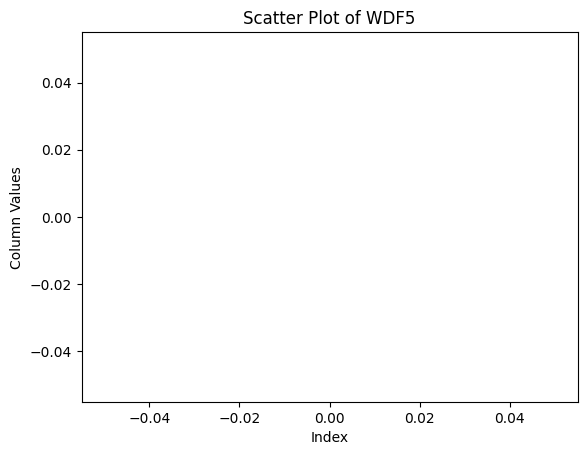

In [819]:
plt.scatter(range(len(df)), df['WDF5'])
plt.title('Scatter Plot of WDF5')
plt.xlabel('Index')
plt.ylabel('Column Values')
plt.show()

In [820]:
df['WDF5'].isnull().sum()

393638

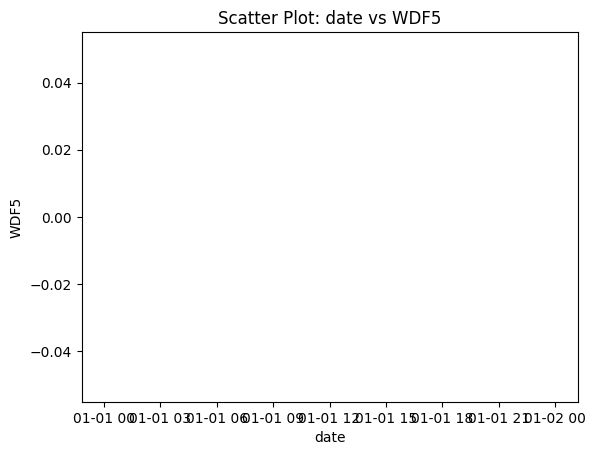

In [821]:
column1 = df['date']
column2 = df['WDF5']

plt.scatter(column1, column2)
plt.title('Scatter Plot: date vs WDF5')
plt.xlabel('date')
plt.ylabel('WDF5')
plt.show()

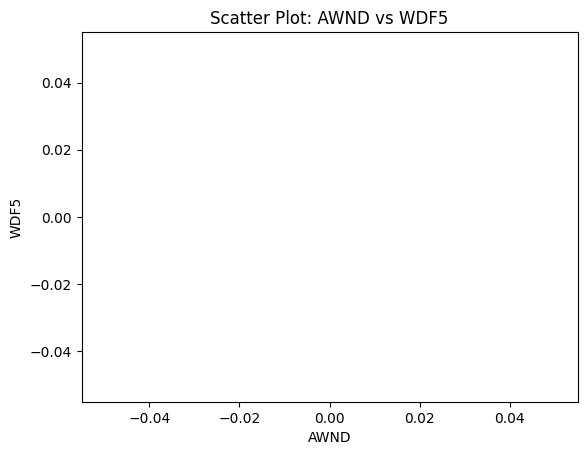

In [822]:
column1 = df['AWND']
column2 = df['WDF5']

plt.scatter(column1, column2)
plt.title('Scatter Plot: AWND vs WDF5')
plt.xlabel('AWND')
plt.ylabel('WDF5')
plt.show()

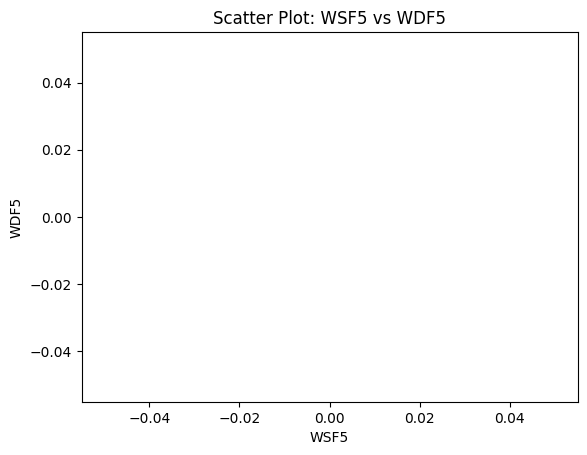

In [823]:
column1 = df['WSF5']
column2 = df['WDF5']

plt.scatter(column1, column2)
plt.title('Scatter Plot: WSF5 vs WDF5')
plt.xlabel('WSF5')
plt.ylabel('WDF5')
plt.show()

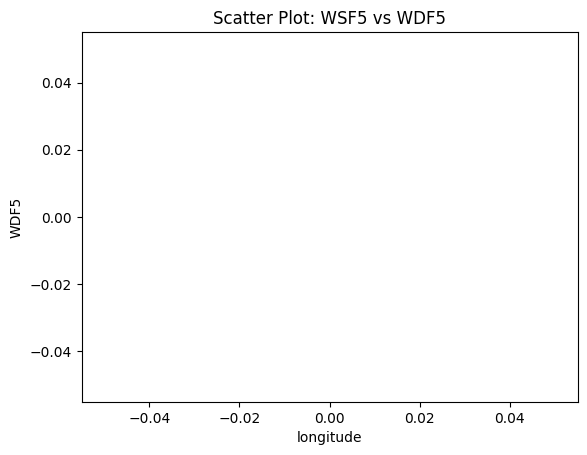

In [824]:
column1 = df['longitude']
column2 = df['WDF5']

plt.scatter(column1, column2)
plt.title('Scatter Plot: WSF5 vs WDF5')
plt.xlabel('longitude')
plt.ylabel('WDF5')
plt.show()

In [825]:
corr = df['WSF5'].corr(df['WDF5'])
print ("Correlation between AWND and WDF5 is: ", round(corr, 2))

Correlation between AWND and WDF5 is:  nan


In [826]:
corr = df['longitude'].corr(df['WDF5'])
print ("Correlation between longitude and WDF5 is: ", round(corr, 2))

Correlation between longitude and WDF5 is:  nan


the value of df['WDF5'].std() is large, so data is distributed -> can't use mean WDF5 does not depends on any column in the df so I can't fill missing values, the missing values are nearly 200,000 (half of df) -> the best apporoch is to drop the column

In [827]:
df = df.drop('WDF5', axis=1)

In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393638 entries, 0 to 416936
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    393638 non-null  object        
 1   state      393638 non-null  object        
 2   latitude   393638 non-null  float64       
 3   longitude  393638 non-null  float64       
 4   elevation  393638 non-null  float64       
 5   date       393638 non-null  datetime64[ns]
 6   TMIN       393638 non-null  float64       
 7   TMAX       393638 non-null  float64       
 8   TAVG       393638 non-null  float64       
 9   AWND       393638 non-null  float64       
 10  WSF5       393638 non-null  float64       
 11  SNOW       393638 non-null  float64       
 12  SNWD       393638 non-null  float64       
 13  PRCP       393638 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 45.0+ MB


# Tempreture

# TMAX, TMIN, TAVG

TMAX = Maximum temperature (tenths of degrees C)

TMIN = Minimum temperature (tenths of degrees C)

TAVG = Average temperature (tenths of degrees C)

In [829]:
print(df['TAVG'].mean())
print(df['TAVG'].median())
print(df['TAVG'].std())

52.13028101410404
54.32
19.417099170732786


In [830]:
print(df['TMIN'].mean())
print(df['TMIN'].median())
print(df['TMIN'].std())

41.88454340711928
42.98
18.839095445988026


In [831]:
print(df['TMAX'].mean())
print(df['TMAX'].median())
print(df['TMAX'].std())

63.06287300643562
66.02
20.89270756553355


high mean and median and low std -> this means data is centralized

avg = (min + max / 2) if 2 operands are known -> clac the third

In [832]:
records_with_criteria = df[(df['TMIN'].notnull()) & (df['TMAX'].notnull()) & (df['TAVG'].isnull())]
records_with_criteria.shape

(0, 14)

In [833]:
df.loc[records_with_criteria.index, 'TAVG'] = (df.loc[records_with_criteria.index, 'TMIN'] + df.loc[records_with_criteria.index, 'TMAX']) / 2

In [834]:
rows_with_criteria = df[(df['TAVG'].notnull()) & (df['TMIN'].notnull()) & (df['TMAX'].isnull())]
print(rows_with_criteria.shape)
df.loc[rows_with_criteria.index, 'TMAX'] = 2 * df.loc[rows_with_criteria.index, 'TAVG'] - df.loc[rows_with_criteria.index, 'TMIN']

(0, 14)


In [835]:
rows_with_criteria = df[(df['TAVG'].notnull()) & (df['TMAX'].notnull()) & (df['TMIN'].isnull())]
print(rows_with_criteria.shape)
df.loc[rows_with_criteria.index, 'TMIN'] = 2 * df.loc[rows_with_criteria.index, 'TAVG'] - df.loc[rows_with_criteria.index, 'TMAX']

(0, 14)


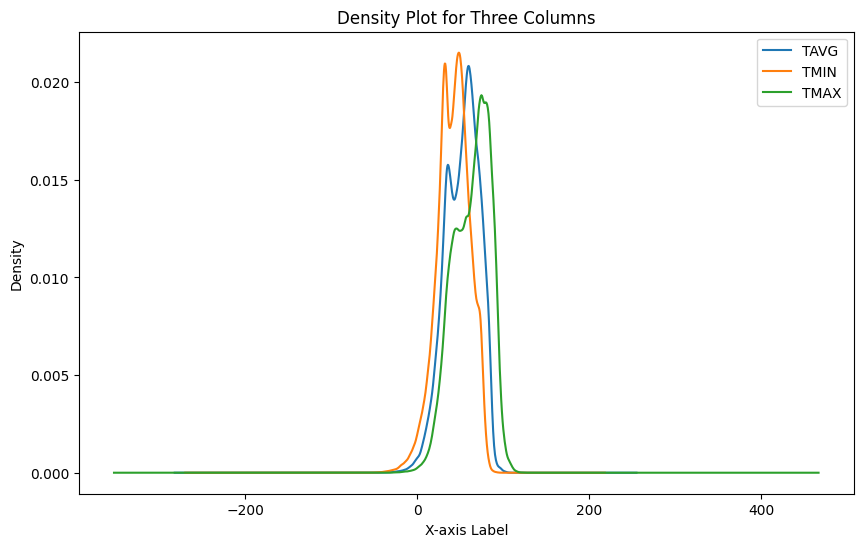

In [836]:
column1 = df['TAVG']
column2 = df['TMIN']
column3 = df['TMAX']

plt.figure(figsize=(10, 6))  
column1.plot.density(label='TAVG')
column2.plot.density(label='TMIN')
column3.plot.density(label='TMAX')

plt.xlabel('X-axis Label')
plt.ylabel('Density')
plt.title('Density Plot for Three Columns')
plt.legend()

plt.show()

data is centralized -> if know avg and null min or max, fill them with avg

In [837]:
df['TMIN'].fillna(df['TAVG'], inplace=True)
df['TMAX'].fillna(df['TAVG'], inplace=True)

outliers

In [838]:
lis = []
states = df['state'].unique()
outlier_df = pd.DataFrame()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['TAVG'].notnull())]
        iqr = rows_with_criteria['TAVG'].quantile(0.75) - rows_with_criteria['TAVG'].quantile(0.25)
        lower_threshold = rows_with_criteria['TAVG'].quantile(0.25) - 1.5 * iqr
        upper_threshold = rows_with_criteria['TAVG'].quantile(0.75) + 1.5 * iqr
        outliers = rows_with_criteria[(rows_with_criteria['TAVG'] < lower_threshold) | (rows_with_criteria['TAVG'] > upper_threshold)]
        result = pd.concat([result, outliers, outliers]).drop_duplicates(keep=False)
df = result       

In [839]:
lis = []
states = df['state'].unique()
outlier_df = pd.DataFrame()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['TMIN'].notnull())]
        iqr = rows_with_criteria['TMIN'].quantile(0.75) - rows_with_criteria['TMIN'].quantile(0.25)
        lower_threshold = rows_with_criteria['TMIN'].quantile(0.25) - 1.5 * iqr
        upper_threshold = rows_with_criteria['TMIN'].quantile(0.75) + 1.5 * iqr
        outliers = rows_with_criteria[(rows_with_criteria['TMIN'] < lower_threshold) | (rows_with_criteria['TMIN'] > upper_threshold)]
        result = pd.concat([result, outliers, outliers]).drop_duplicates(keep=False)
df = result        

In [840]:
lis = []
states = df['state'].unique()
outlier_df = pd.DataFrame()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['TMAX'].notnull())]
        iqr = rows_with_criteria['TMAX'].quantile(0.75) - rows_with_criteria['TMAX'].quantile(0.25)
        lower_threshold = rows_with_criteria['TMAX'].quantile(0.25) - 1.5 * iqr
        upper_threshold = rows_with_criteria['TMAX'].quantile(0.75) + 1.5 * iqr
        outliers = rows_with_criteria[(rows_with_criteria['TMAX'] < lower_threshold) | (rows_with_criteria['TMAX'] > upper_threshold)]
        result = pd.concat([result, outliers, outliers]).drop_duplicates(keep=False)
df = result    

In [841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381512 entries, 1 to 416934
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    381512 non-null  object        
 1   state      381512 non-null  object        
 2   latitude   381512 non-null  float64       
 3   longitude  381512 non-null  float64       
 4   elevation  381512 non-null  float64       
 5   date       381512 non-null  datetime64[ns]
 6   TMIN       381512 non-null  float64       
 7   TMAX       381512 non-null  float64       
 8   TAVG       381512 non-null  float64       
 9   AWND       381512 non-null  float64       
 10  WSF5       381512 non-null  float64       
 11  SNOW       381512 non-null  float64       
 12  SNWD       381512 non-null  float64       
 13  PRCP       381512 non-null  float64       
 14  WDF5       0 non-null       float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 46.6+ MB


In [842]:
non_null_count = df.groupby('state')['TAVG'].count()
top_10 = non_null_count.nlargest(10)
top_10

state
UT    30083
MT    25835
CA    24972
OR    24824
WA    22579
WY    22360
CO    21113
ID    20355
AK    17063
TX    13684
Name: TAVG, dtype: int64

In [843]:
states = ['CA', 'TX', 'UT', 'MT', 'WA', 'WY', 'ID', 'CO', 'OR', 'AK']
filtered_df = df[df['state'].isin(states)]

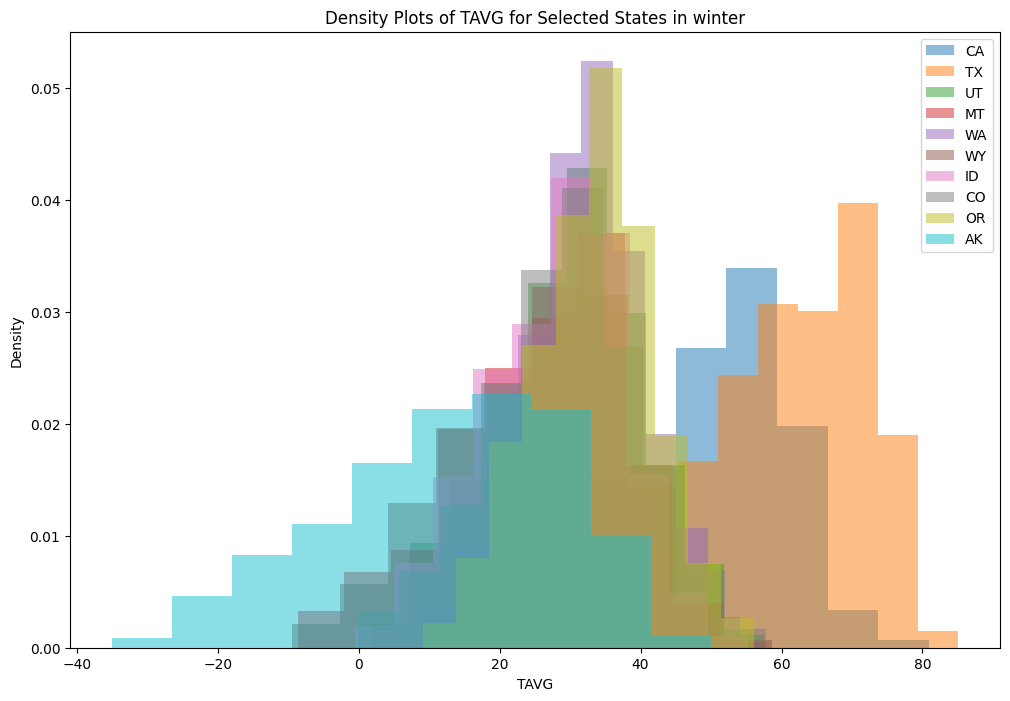

In [844]:
plt.figure(figsize=(12, 8))

for state in states:
    filtered_df = df[(df['date'].dt.month.isin([1,2,3])) &(df['state'] == state)]
    plt.hist(filtered_df['TAVG'], density=True, alpha=0.5, label=state)

plt.xlabel('TAVG')
plt.ylabel('Density')
plt.title('Density Plots of TAVG for Selected States in winter')
plt.legend()
plt.show()

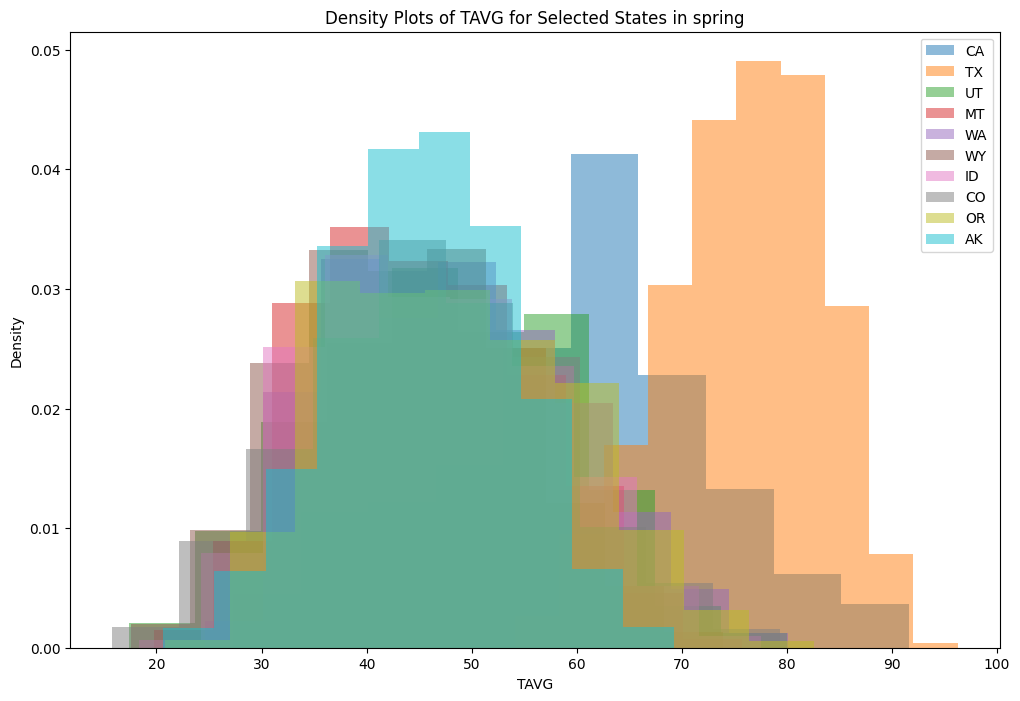

In [845]:
plt.figure(figsize=(12, 8))

for state in states:
    filtered_df = df[(df['date'].dt.month.isin([4,5,6])) &(df['state'] == state)]
    plt.hist(filtered_df['TAVG'], density=True, alpha=0.5, label=state)

plt.xlabel('TAVG')
plt.ylabel('Density')
plt.title('Density Plots of TAVG for Selected States in spring')
plt.legend()
plt.show()

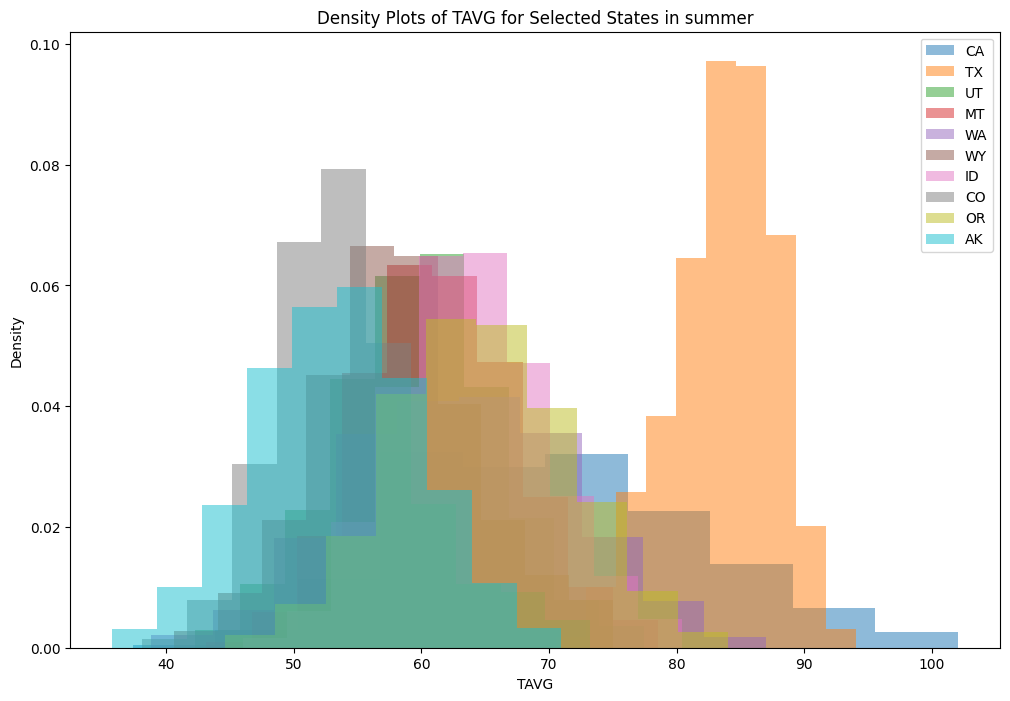

In [846]:
plt.figure(figsize=(12, 8))

for state in states:
    filtered_df = df[(df['date'].dt.month.isin([7,8,9])) &(df['state'] == state)]
    plt.hist(filtered_df['TAVG'], density=True, alpha=0.5, label=state)

plt.xlabel('TAVG')
plt.ylabel('Density')
plt.title('Density Plots of TAVG for Selected States in summer')
plt.legend()
plt.show()

mean TAVG within a seson per state

In [847]:
lis = []
states = df['state'].unique()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['TAVG'].notnull())]
        record = [state, rows_with_criteria['TAVG'].mean()]
        lis.append(record)

convert to an ordered df

In [848]:
new_df = pd.DataFrame(lis, columns=['state', 'TAVG'])

combined_df = new_df.groupby('state').agg({'TAVG': list}).reset_index()

combined_df.set_index('state', inplace=True)

TAVG_state_season = combined_df['TAVG'].apply(pd.Series)

TAVG_state_season.rename(columns={0: 'winter', 1: 'spring', 2: 'summer'}, inplace=True)
TAVG_state_season

,winter,spring,summer
state,,,
AK,12.677705,45.445443,53.471831
AL,57.645641,73.583597,80.721129
AR,51.624268,70.418817,78.221160
AZ,46.750650,64.605113,73.036451
CA,46.473909,59.439587,70.351526
CO,29.232721,46.174770,54.277630
CT,35.168132,59.787782,70.498824
DE,42.377818,65.924798,74.858881
FL,67.374483,78.198683,83.562937


fill missing values with mean of TAVG from TAVG_state_season

In [849]:
def fill_null(row):
    if pd.isnull(row['TAVG']):
        if row['date'].month in [1, 2, 3]:
            return TAVG_state_season.loc[row.state, 'winter']
        elif row['date'].month in [4, 5, 6]:
            return TAVG_state_season.loc[row.state, 'spring']
        else:
            return TAVG_state_season.loc[row.state, 'summer']
    else:
        return row['TAVG']

df['TAVG'] = df.apply(fill_null, axis=1)

data is centralized -> if know avg and null min or max, fill them with avg

In [850]:
df['TMIN'].fillna(df['TAVG'], inplace=True)
df['TMAX'].fillna(df['TAVG'], inplace=True)

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381512 entries, 1 to 416934
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    381512 non-null  object        
 1   state      381512 non-null  object        
 2   latitude   381512 non-null  float64       
 3   longitude  381512 non-null  float64       
 4   elevation  381512 non-null  float64       
 5   date       381512 non-null  datetime64[ns]
 6   TMIN       381512 non-null  float64       
 7   TMAX       381512 non-null  float64       
 8   TAVG       381512 non-null  float64       
 9   AWND       381512 non-null  float64       
 10  WSF5       381512 non-null  float64       
 11  SNOW       381512 non-null  float64       
 12  SNWD       381512 non-null  float64       
 13  PRCP       381512 non-null  float64       
 14  WDF5       0 non-null       float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 46.6+ MB


# PRCP

PRCP = Precipitation (inch)

if no snow -> snow depth is zero

In [852]:
rows_with_criteria = df[((df['SNOW']==0) & (df['SNWD'].isnull()))]
print(rows_with_criteria.shape)
df.loc[(df['SNOW'] == 0) & (df['SNWD'].isnull()), 'SNWD'] = 0

(0, 15)


no snow -> no snow depth

In [853]:
df['SNWD'] = df.apply(lambda row: 0 if row['SNOW'] == 0 and pd.notnull(row['SNWD']) else row['SNWD'], axis=1)

rows_with_criteria = df[((df['SNOW']==0) & (df['SNWD']!=0))]
print(rows_with_criteria.shape)
df.drop(rows_with_criteria.index, inplace=True)

snow depth can't be larger than snow fall

In [854]:
rows_with_criteria = df[((df['SNOW']<df['SNWD']))]
print(rows_with_criteria.shape)
df.drop(rows_with_criteria.index, inplace=True)

(40952, 15)


snow depth can't be exactly equal as snow fall -> drop

In [855]:
rows_with_criteria = df[((df['SNOW']==df['SNWD']) & df['SNOW']!=0)]
df.drop(rows_with_criteria.index, inplace=True)

In [856]:
df.loc[(df['PRCP'] == 0) & (df['SNOW'].isnull()), 'SNOW'] = 0
df.loc[(df['PRCP'] == 0) & (df['SNWD'].isnull()), 'SNWD'] = 0

In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340560 entries, 1 to 416934
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    340560 non-null  object        
 1   state      340560 non-null  object        
 2   latitude   340560 non-null  float64       
 3   longitude  340560 non-null  float64       
 4   elevation  340560 non-null  float64       
 5   date       340560 non-null  datetime64[ns]
 6   TMIN       340560 non-null  float64       
 7   TMAX       340560 non-null  float64       
 8   TAVG       340560 non-null  float64       
 9   AWND       340560 non-null  float64       
 10  WSF5       340560 non-null  float64       
 11  SNOW       340560 non-null  float64       
 12  SNWD       340560 non-null  float64       
 13  PRCP       340560 non-null  float64       
 14  WDF5       0 non-null       float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 41.6+ MB


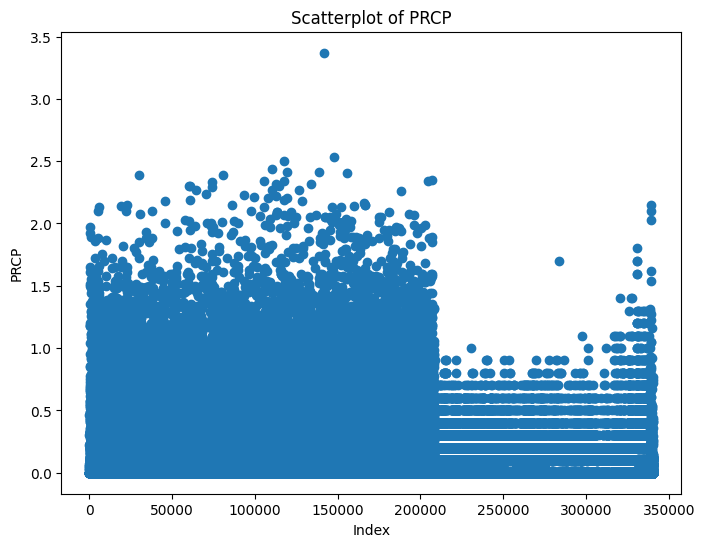

In [858]:
x = range(len(df['PRCP']))

# Plot the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x, df['PRCP'])
plt.title('Scatterplot of PRCP')
plt.xlabel('Index')
plt.ylabel('PRCP')
plt.show()

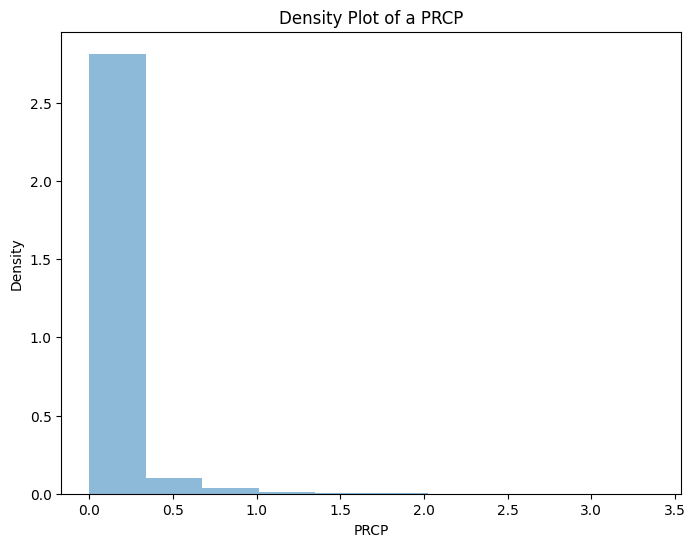

In [859]:
plt.figure(figsize=(8, 6))
plt.title('Density Plot of a PRCP')
plt.xlabel('PRCP')
plt.ylabel('Density')
plt.hist(df['PRCP'], density=True, bins=10, alpha=0.5)
plt.show()

In [860]:
non_null_count = df.groupby('state')['PRCP'].count()
top_10 = non_null_count.nlargest(10)
top_10

state
UT    24973
CA    23284
MT    19673
OR    19189
WA    17530
CO    17361
WY    17321
AK    16198
ID    15100
TX    13684
Name: PRCP, dtype: int64

In [861]:
top_ten_states = ['UT', 'MT', 'CA', 'OR', 'WA', 'WY', 'CO', 'AK', 'TX', 'ID']

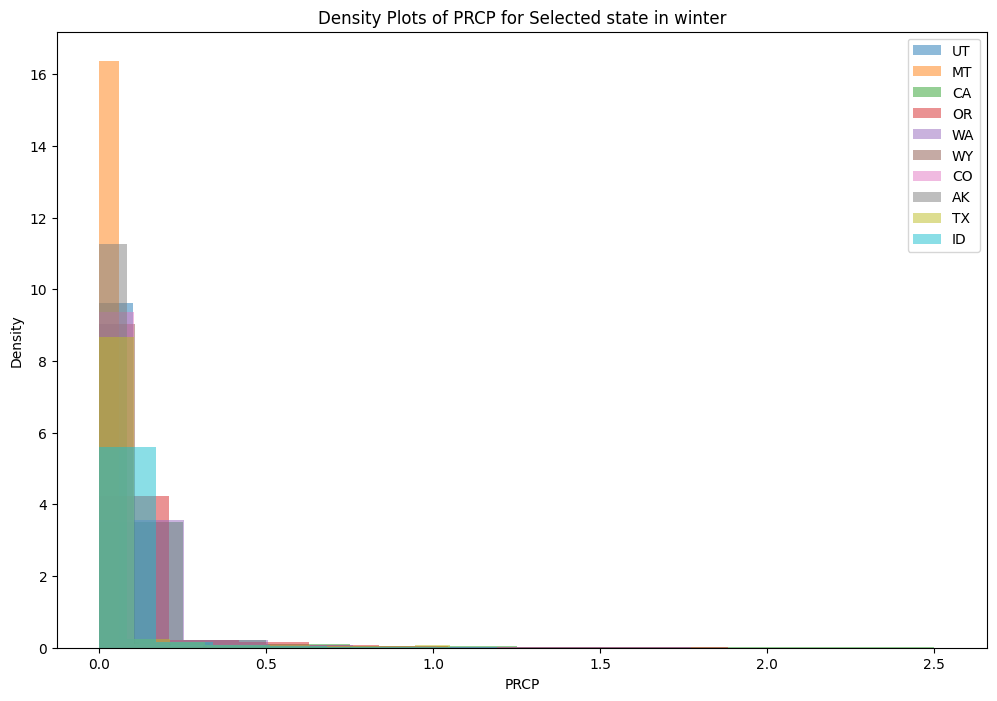

In [862]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([1,2,3])) &(df['state'] == state)]
    plt.hist(filtered_df['PRCP'], density=True, alpha=0.5, label=state)

plt.xlabel('PRCP')
plt.ylabel('Density')
plt.title('Density Plots of PRCP for Selected state in winter')
plt.legend()
plt.show()

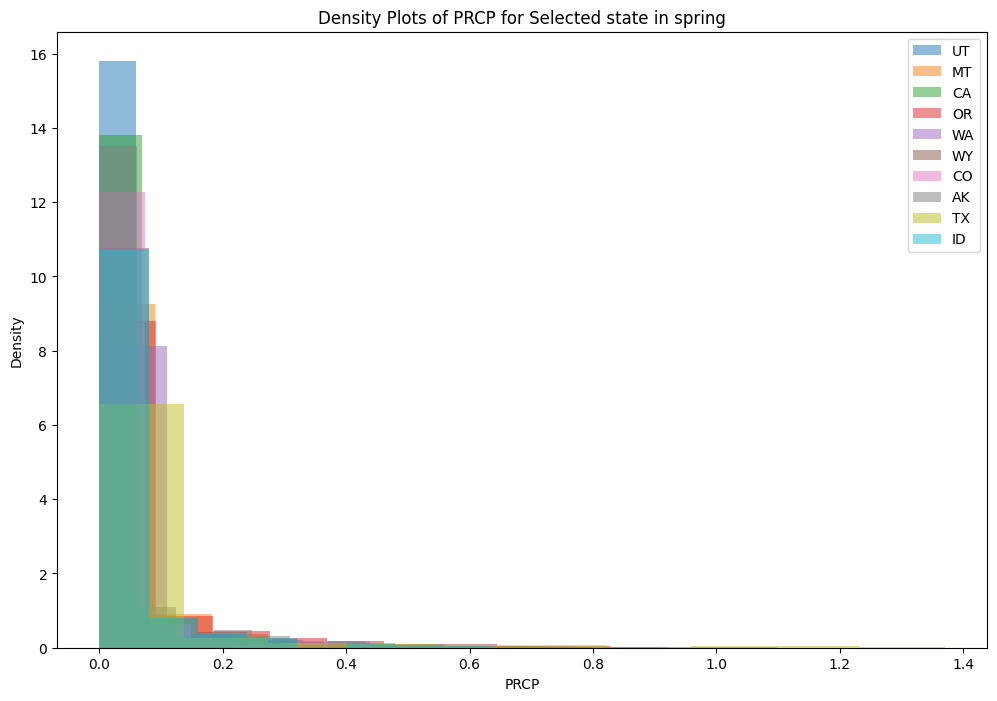

In [863]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([4,5,6])) &(df['state'] == state)]
    plt.hist(filtered_df['PRCP'], density=True, alpha=0.5, label=state)

plt.xlabel('PRCP')
plt.ylabel('Density')
plt.title('Density Plots of PRCP for Selected state in spring')
plt.legend()
plt.show()

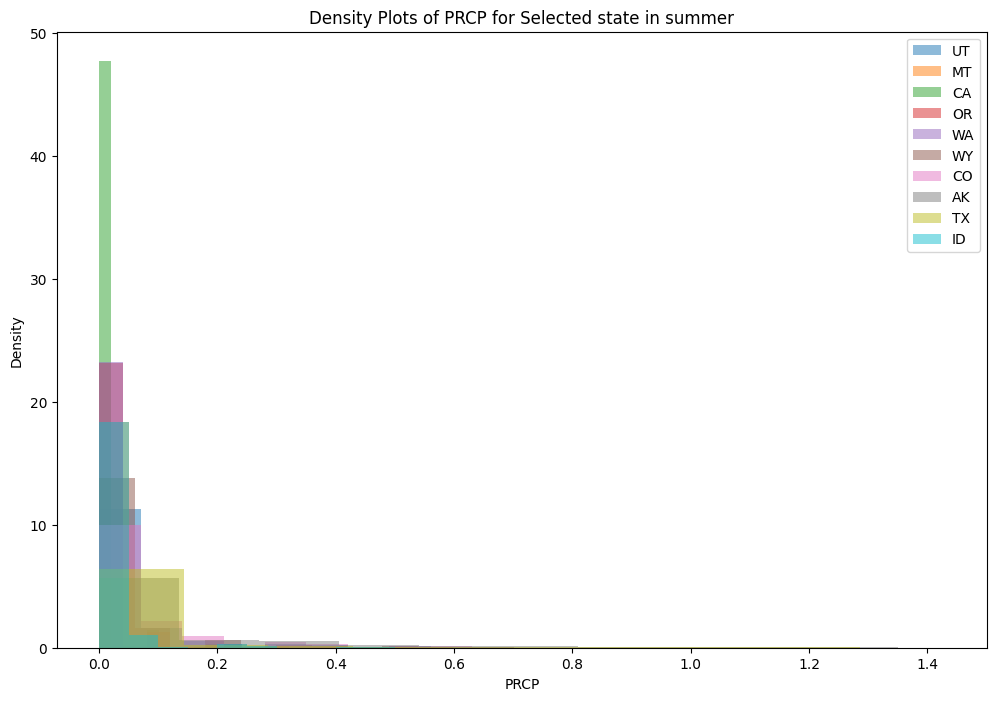

In [864]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([7,8,9])) &(df['state'] == state)]
    plt.hist(filtered_df['PRCP'], density=True, alpha=0.5, label=state)

plt.xlabel('PRCP')
plt.ylabel('Density')
plt.title('Density Plots of PRCP for Selected state in summer')
plt.legend()
plt.show()

data is centralized

outliers of PRCP within a season per state.

In [865]:
lis = []
states = df['state'].unique()
outlier_df = pd.DataFrame()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['PRCP'].notnull())]
        iqr = rows_with_criteria['PRCP'].quantile(0.75) - rows_with_criteria['PRCP'].quantile(0.25)
        lower_threshold = rows_with_criteria['PRCP'].quantile(0.25) - 1.5 * iqr
        upper_threshold = rows_with_criteria['PRCP'].quantile(0.9799) + 1.5 * iqr
        outliers = rows_with_criteria[(rows_with_criteria['PRCP'] < lower_threshold) | (rows_with_criteria['PRCP'] > upper_threshold)]
        result = pd.concat([result, outliers, outliers]).drop_duplicates(keep=False)
df = result

In [866]:
outlier_df.shape

(0, 0)

In [867]:
result = pd.concat([df, outlier_df, outlier_df]).drop_duplicates(keep=False)
df = result

Missing values

In [868]:
null_rows = df[df['PRCP'].isnull()]
null_rows.shape

(0, 15)

AVG of PRCP within a seson within a state to fill missing values in a list

In [869]:
lis = []
states = df['state'].unique()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+1])) &(df['state'] == state) &(df['PRCP'].notnull())]
        record = [state, rows_with_criteria['PRCP'].mean()]
        lis.append(record)

PRCP in season per state in an ordered dataframe

In [870]:
new_df = pd.DataFrame(lis, columns=['state', 'PRCP'])

combined_df = new_df.groupby('state').agg({'PRCP': list}).reset_index()

combined_df.set_index('state', inplace=True)

PRCP_state_season = combined_df['PRCP'].apply(pd.Series)

PRCP_state_season.rename(columns={0: 'winter', 1: 'spring', 2: 'summer'}, inplace=True)
PRCP_state_season.shape

(54, 3)

fill missing values of PRCP with mean of PRCP in season in state

In [871]:
def fill_null(row):
    if pd.isnull(row['PRCP']):
        if row['date'].month in [1, 2, 3]:
            return PRCP_state_season.loc[row.state, 'winter']
        elif row['date'].month in [4, 5, 6]:
            return PRCP_state_season.loc[row.state, 'spring']
        else:
            return PRCP_state_season.loc[row.state, 'summer']
    else:
        return row['PRCP']

df['PRCP'] = df.apply(fill_null, axis=1)

In [872]:
null_rows = df[df['PRCP'].isnull()]
null_rows.shape

(0, 15)

In [873]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335073 entries, 1 to 416934
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    335073 non-null  object        
 1   state      335073 non-null  object        
 2   latitude   335073 non-null  float64       
 3   longitude  335073 non-null  float64       
 4   elevation  335073 non-null  float64       
 5   date       335073 non-null  datetime64[ns]
 6   TMIN       335073 non-null  float64       
 7   TMAX       335073 non-null  float64       
 8   TAVG       335073 non-null  float64       
 9   AWND       335073 non-null  float64       
 10  WSF5       335073 non-null  float64       
 11  SNOW       335073 non-null  float64       
 12  SNWD       335073 non-null  float64       
 13  PRCP       335073 non-null  float64       
 14  WDF5       0 non-null       float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 40.9+ MB


# SNOW

In [874]:
print(df['SNOW'].mean())
print(df['SNOW'].median())
print(df['SNOW'].std())

0.005396907985156447
0.0
0.16460822507293904


data is centralized

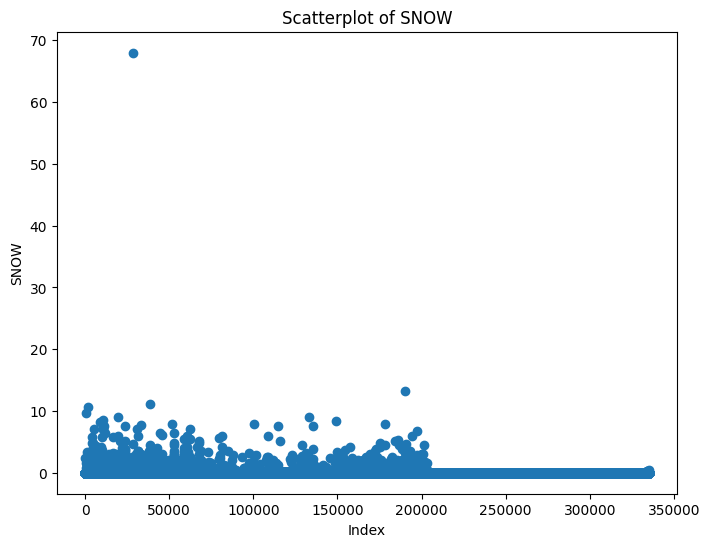

In [875]:
x = range(len(df['SNOW']))

plt.figure(figsize=(8, 6))
plt.scatter(x, df['SNOW'])
plt.title('Scatterplot of SNOW')
plt.xlabel('Index')
plt.ylabel('SNOW')
plt.show()

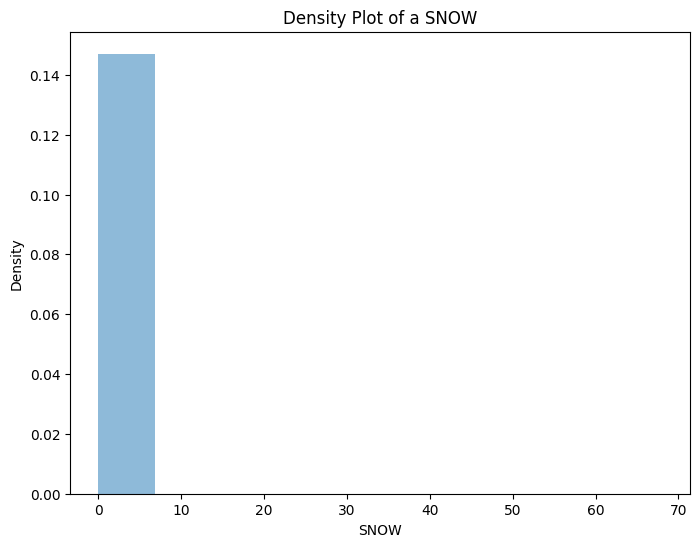

In [876]:
plt.figure(figsize=(8, 6))
plt.title('Density Plot of a SNOW')
plt.xlabel('SNOW')
plt.ylabel('Density')
plt.hist(df['SNOW'], density=True, bins=10, alpha=0.5)
plt.show()

In [877]:
non_null_count = df.groupby('state')['SNOW'].count()
top_10 = non_null_count.nlargest(10)
top_10

state
UT    24583
CA    22922
MT    19365
OR    18834
WA    17259
CO    17127
WY    16972
AK    15967
ID    14882
TX    13413
Name: SNOW, dtype: int64

In [878]:
top_ten_states = ['CA', 'UT', 'OR', 'TX', 'MT', 'WA', 'CO', 'AK', 'WY', 'ID']

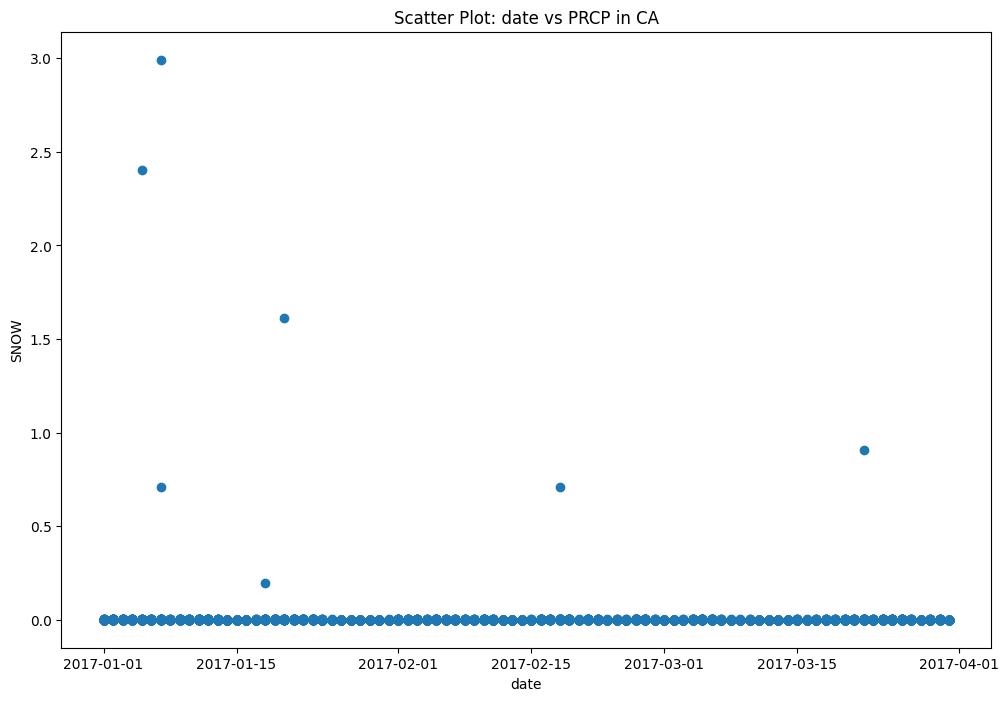

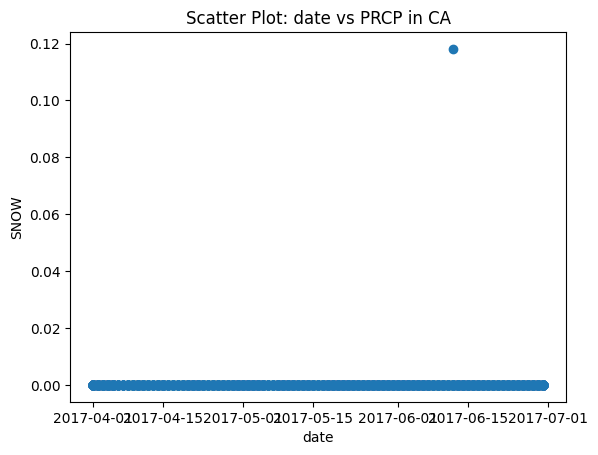

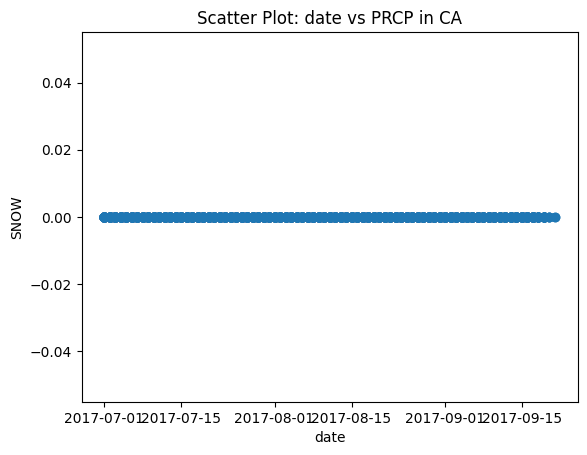

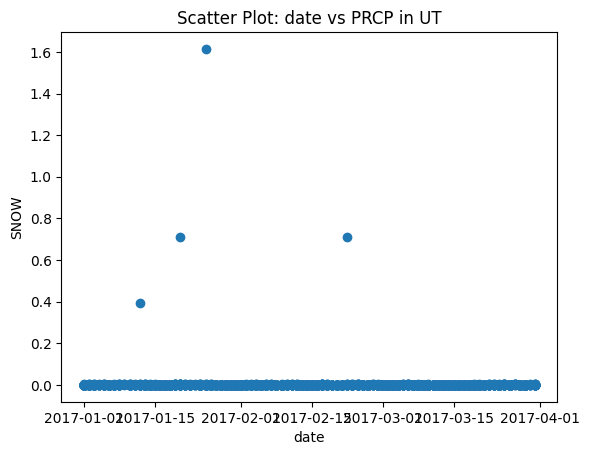

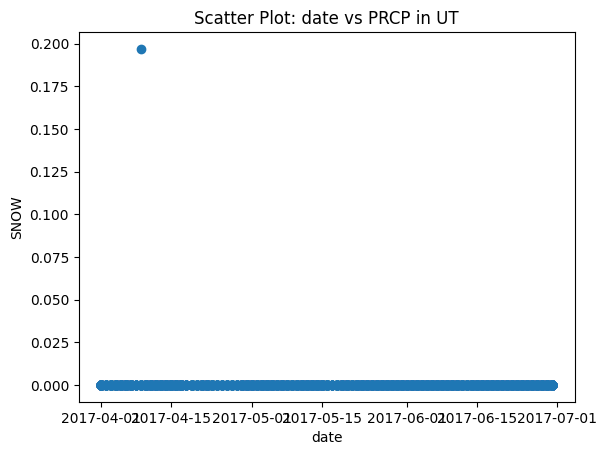

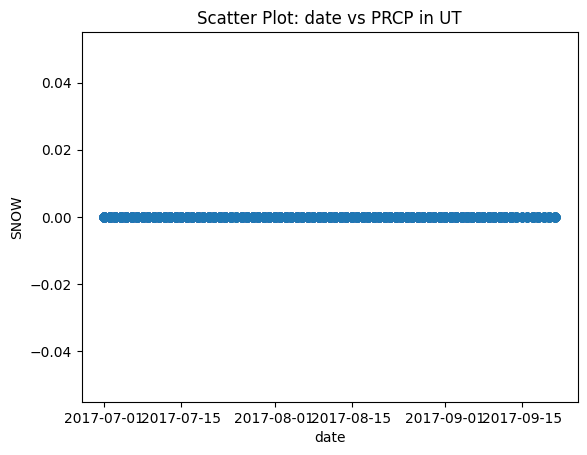

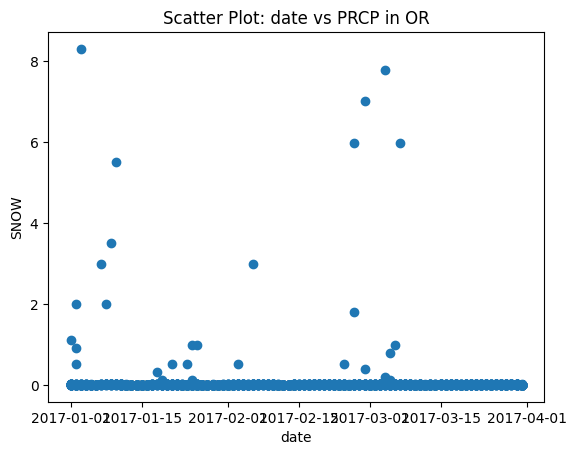

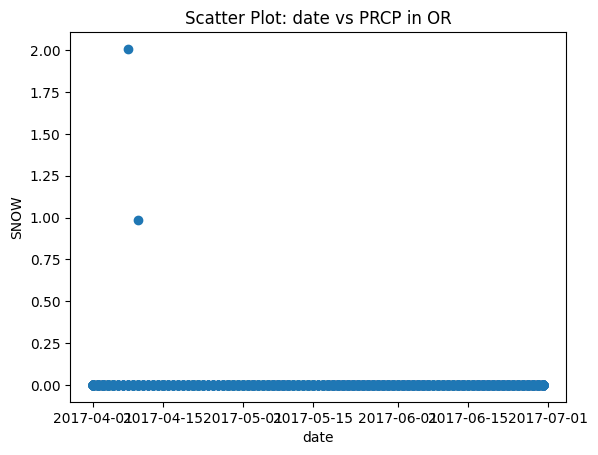

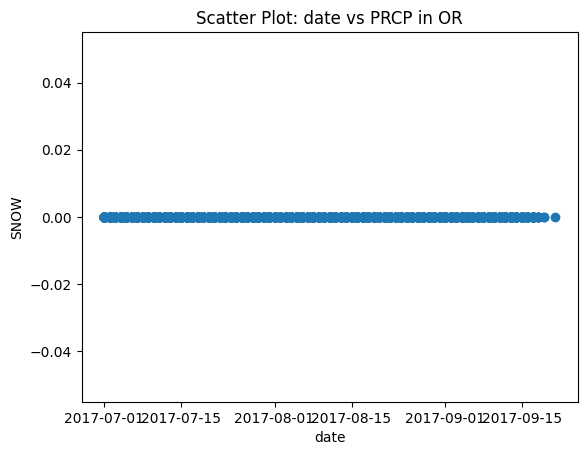

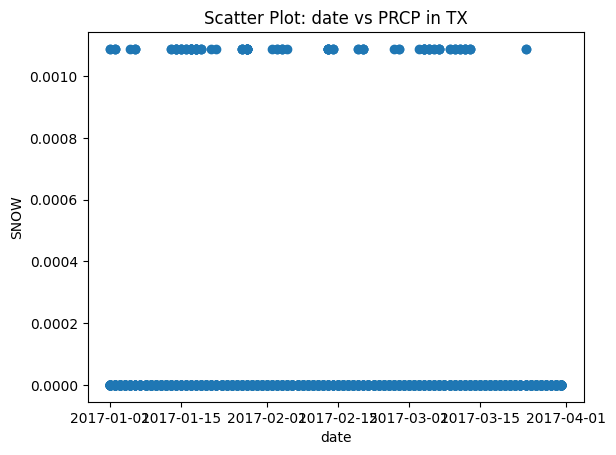

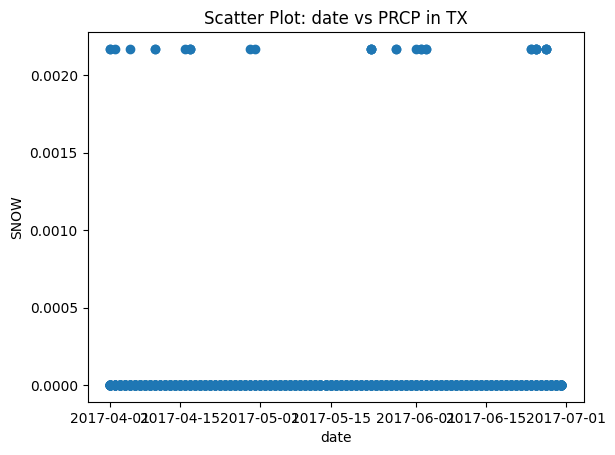

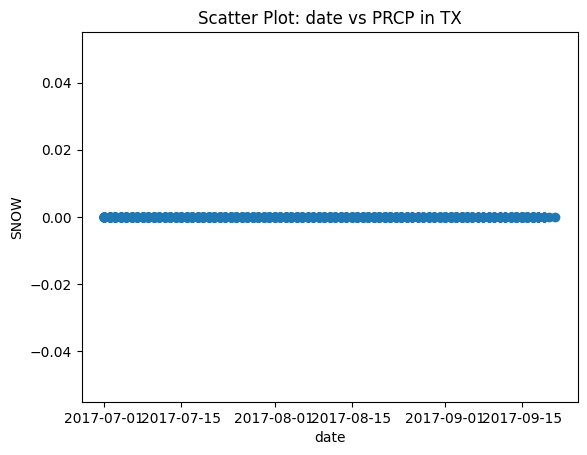

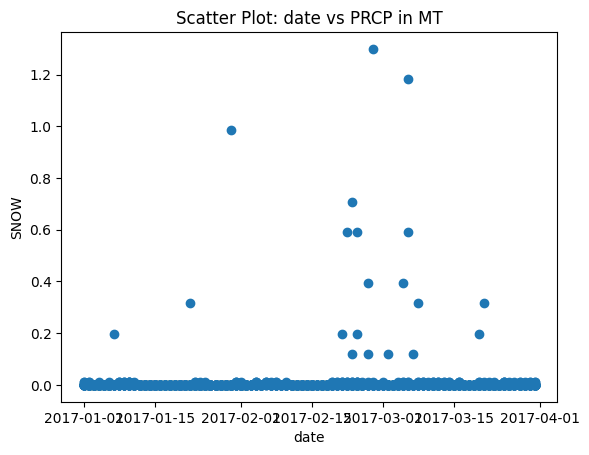

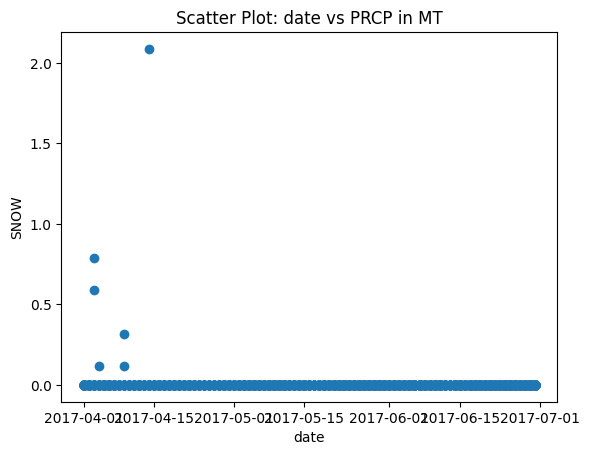

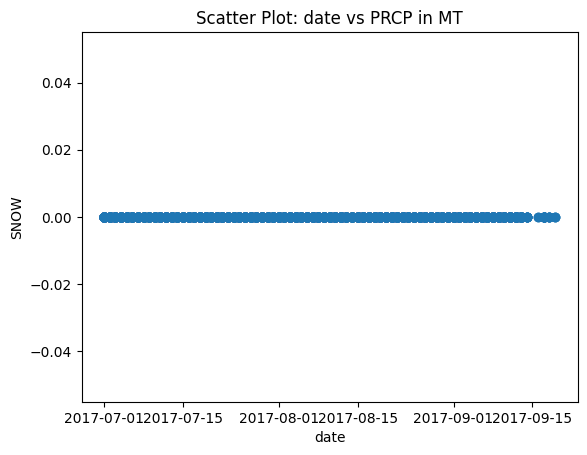

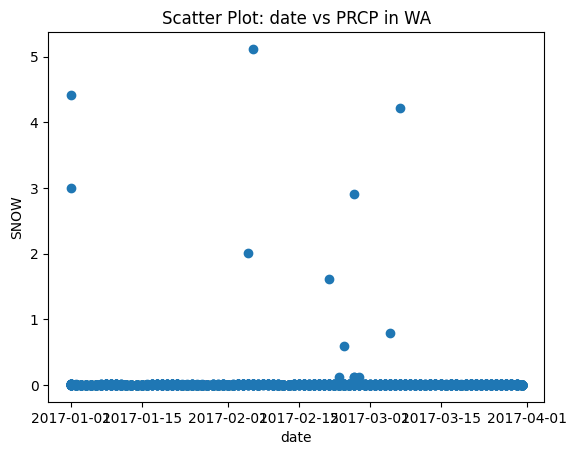

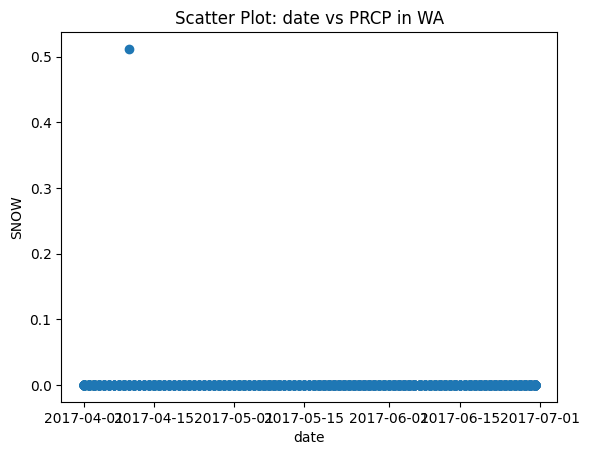

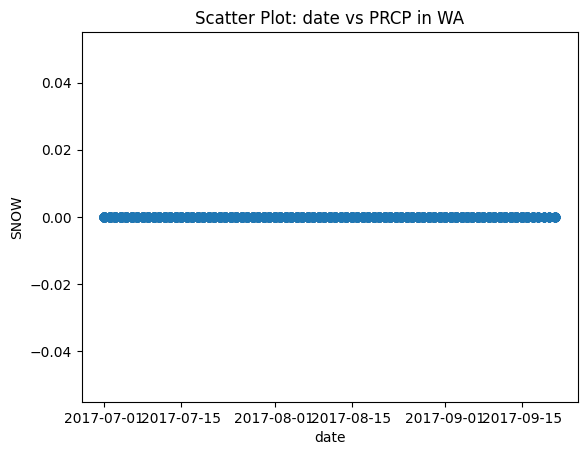

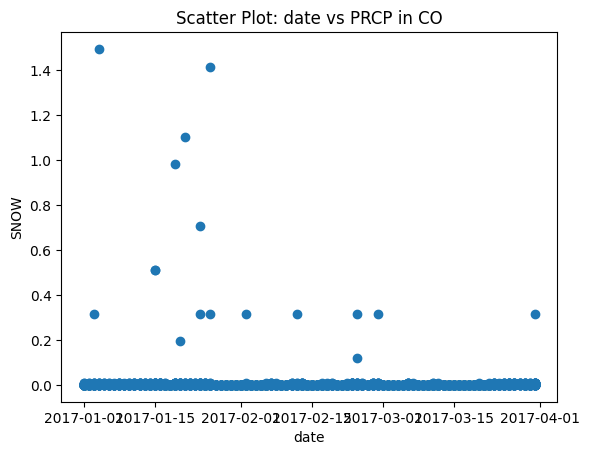

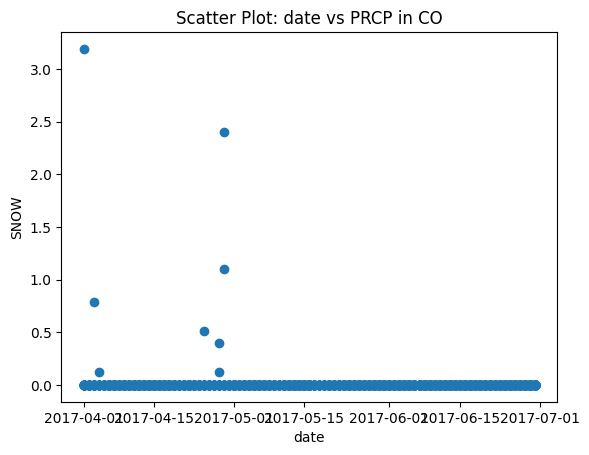

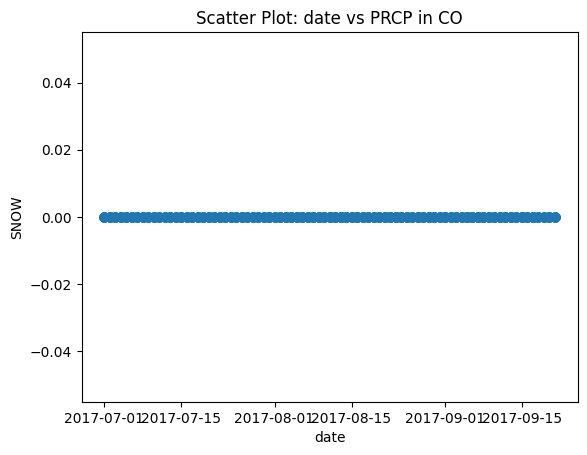

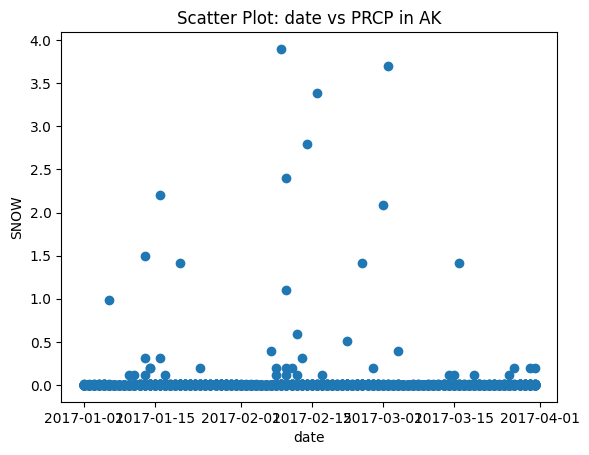

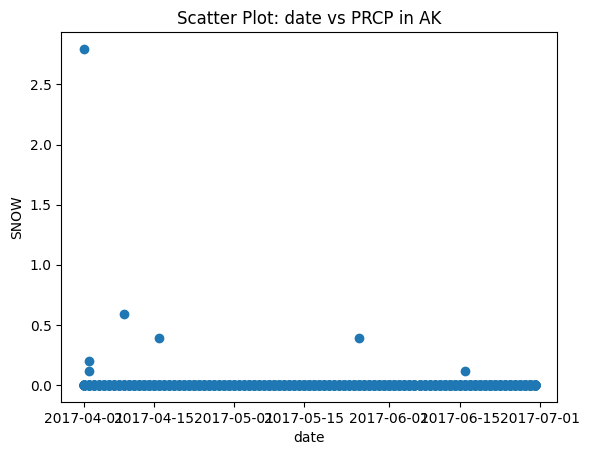

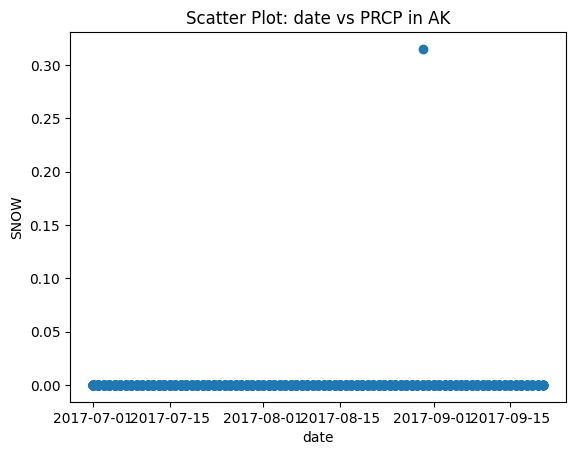

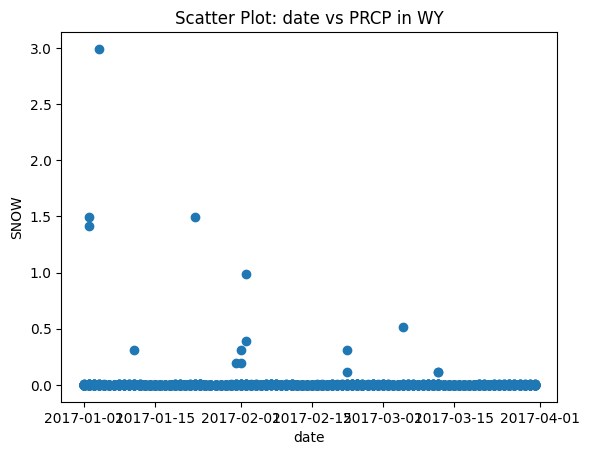

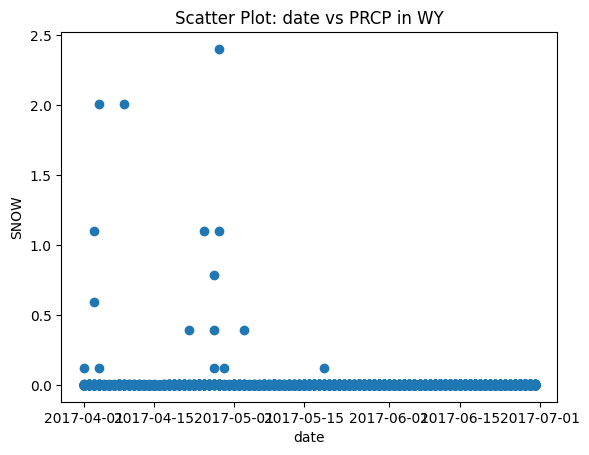

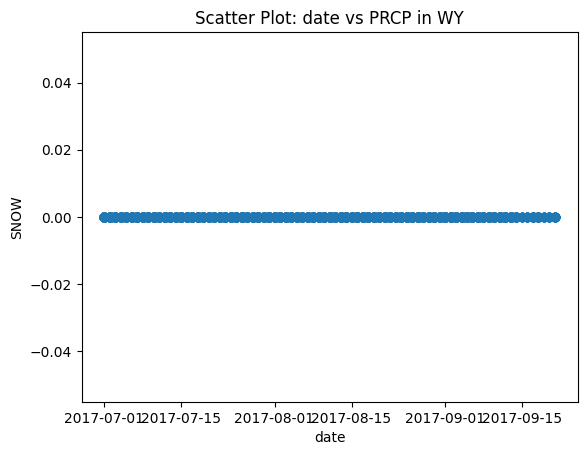

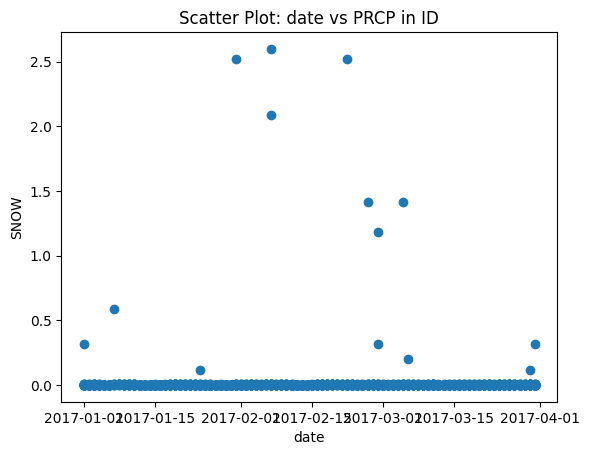

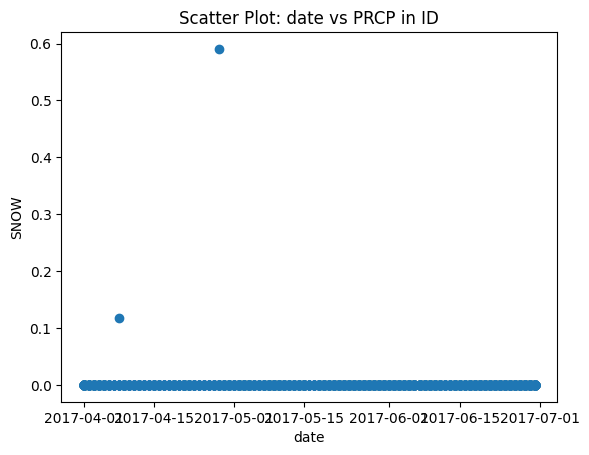

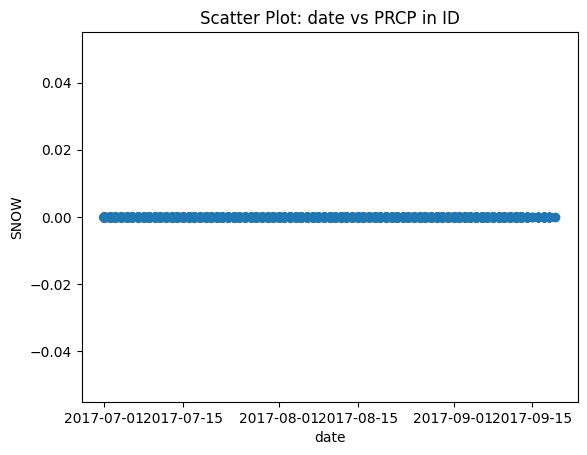

In [879]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    for i in range (1,8,3):
        filtered_df = df[(df['date'].dt.month.isin([i,i+1,i+2])) &(df['state'] == state)]
        plt.scatter(filtered_df['date'], filtered_df['SNOW'])
        plt.xlabel('date')
        plt.ylabel('SNOW')
        plt.title('Scatter Plot: date vs PRCP in {}'.format(state))
        plt.show()

In [880]:
for state in top_ten_states:
    for i in range (1,8,3):
        print(state)
        print('mean= ', df['SNOW'].mean())
        print('median= ', df['SNOW'].median())
        print('std= ', df['SNOW'].std())        

CA
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
CA
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
CA
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
UT
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
UT
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
UT
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
OR
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
OR
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
OR
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
TX
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
TX
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
TX
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
MT
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
MT
mean=  0.005396907985156447
median=  0.0
std=  0.16460822507293904
MT
mean=  0.00539690

CA
mean=  0.0016607579654756874
median=  0.0
std=  0.05120603892045014
UT
mean=  0.0005698453942071637
median=  0.0
std=  0.024209605083670455
OR
mean=  0.01927868098467928
median=  0.0
std=  0.27696271913527043
TX
mean=  2.6969915232552084e-05
median=  0.0
std=  0.00016918160809396447
MT
mean=  0.0020234354847397805
median=  0.0
std=  0.03570804748198256
WA
mean=  0.007250692564406675
median=  0.0
std=  0.1446190999874719
CO
mean=  0.0024463820464393033
median=  0.0
std=  0.04218771283717567
AK
mean=  0.00823489312047765
median=  0.0
std=  0.12252701458800529
WY
mean=  0.0029060284504235185
median=  0.0
std=  0.06066777124732457
ID
mean=  0.005398722591909212
median=  0.0
std=  0.09254954786918441


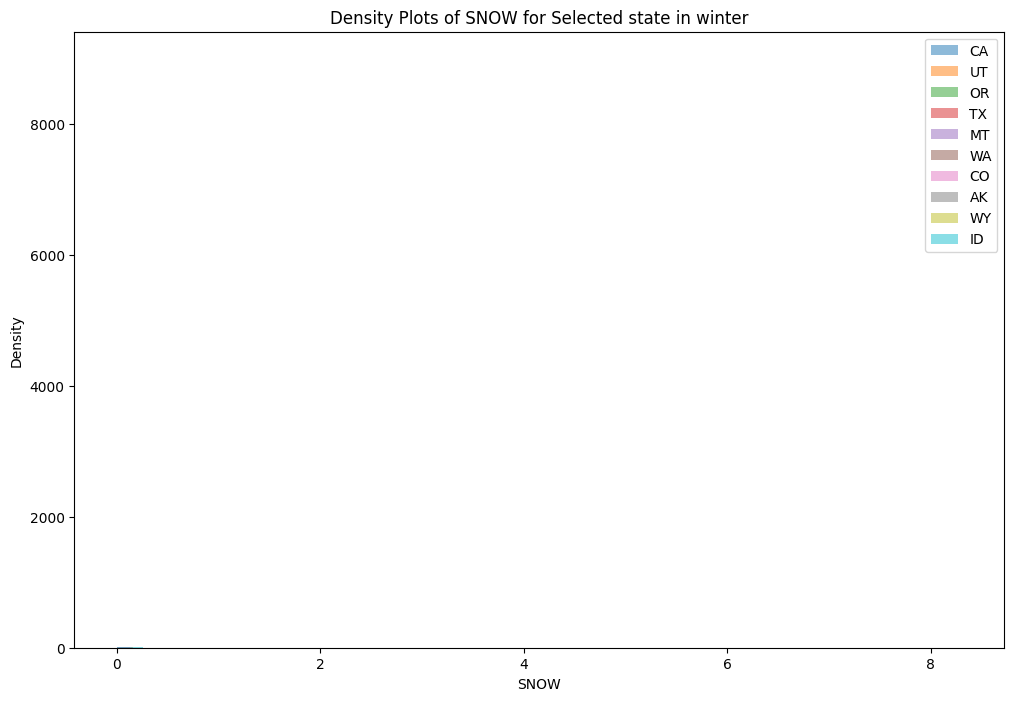

In [881]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([1,2,3])) &(df['state'] == state)]
    plt.hist(filtered_df['SNOW'], density=True, alpha=0.5, label=state)
    print(state)
    print('mean= ', filtered_df['SNOW'].mean())
    print('median= ', filtered_df['SNOW'].median())
    print('std= ', filtered_df['SNOW'].std())

plt.xlabel('SNOW')
plt.ylabel('Density')
plt.title('Density Plots of SNOW for Selected state in winter')
plt.legend()
plt.show()

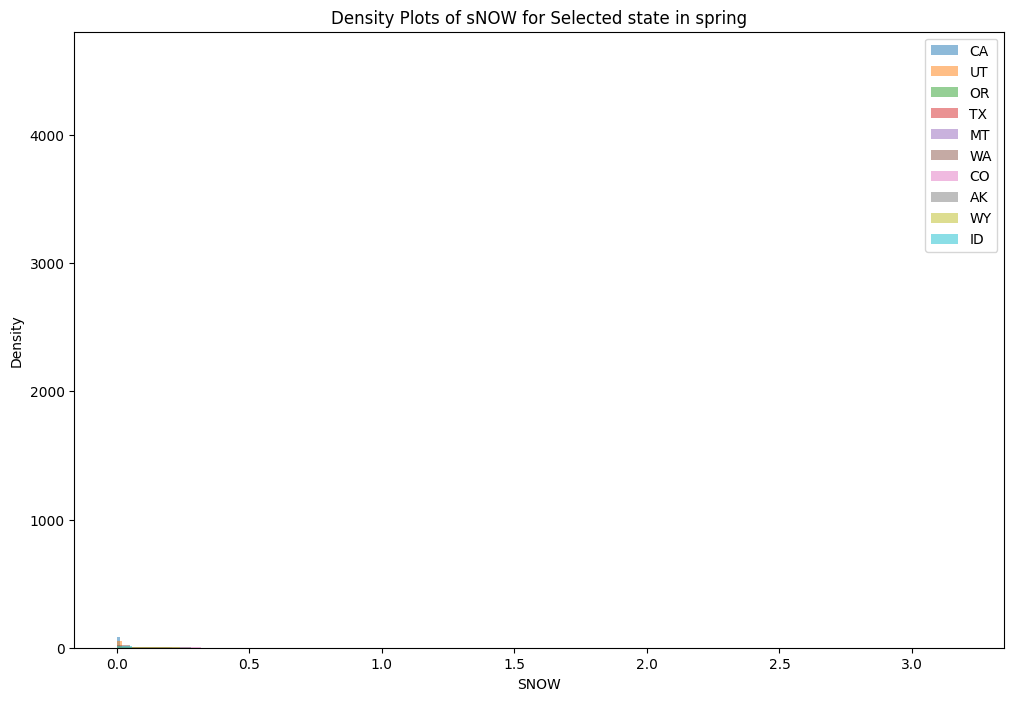

In [882]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    filtered_df = df[(df['date'].dt.month.isin([4,5,6])) &(df['state'] == state)]
    plt.hist(filtered_df['SNOW'], density=True, alpha=0.5, label=state)

plt.xlabel('SNOW')
plt.ylabel('Density')
plt.title('Density Plots of sNOW for Selected state in spring')
plt.legend()
plt.show()

CA
mean=  0.0
median=  0.0
std=  0.0
UT
mean=  0.0
median=  0.0
std=  0.0
OR
mean=  0.0
median=  0.0
std=  0.0
TX
mean=  0.0
median=  0.0
std=  0.0
MT
mean=  0.0
median=  0.0
std=  0.0
WA
mean=  0.0
median=  0.0
std=  0.0
CO
mean=  0.0
median=  0.0
std=  0.0
AK
mean=  0.00013237564552359975
median=  0.0
std=  0.004311785975586753
WY
mean=  0.0
median=  0.0
std=  0.0
ID
mean=  0.0
median=  0.0
std=  0.0


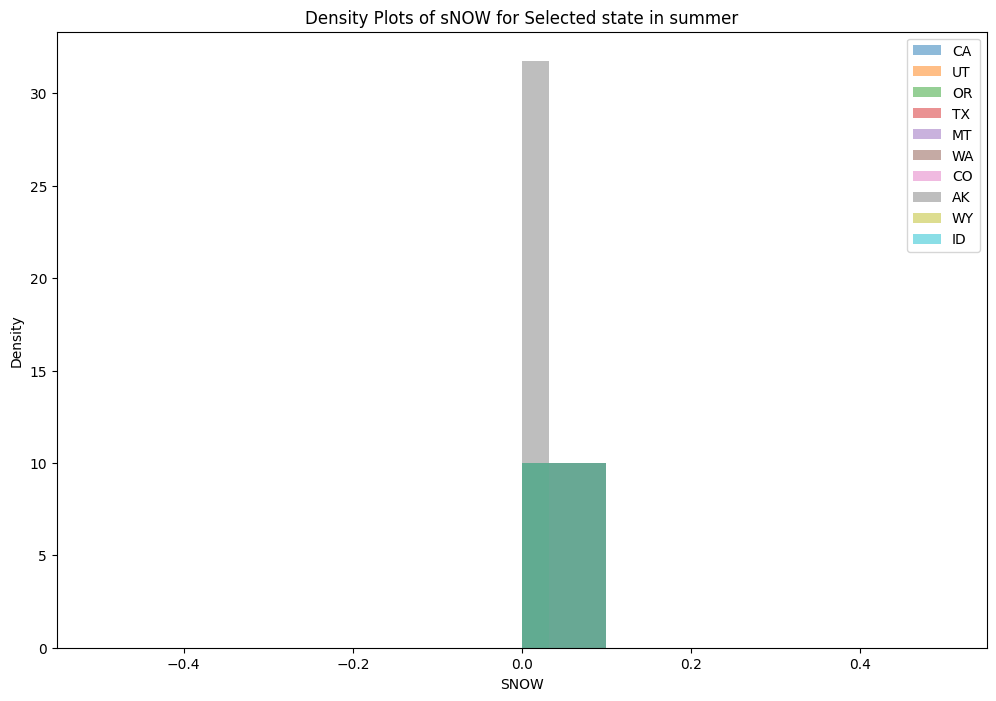

In [883]:
plt.figure(figsize=(12, 8))

for state in top_ten_states:
    

    
    filtered_df = df[(df['date'].dt.month.isin([7,8,9])) &(df['state'] == state)]
    plt.hist(filtered_df['SNOW'], density=True, alpha=0.5, label=state)
    print(state)
    print('mean= ', filtered_df['SNOW'].mean())
    print('median= ', filtered_df['SNOW'].median())
    print('std= ', filtered_df['SNOW'].std())

plt.xlabel('SNOW')
plt.ylabel('Density')
plt.title('Density Plots of sNOW for Selected state in summer')
plt.legend()
plt.show()

data is cenrtalized

In [884]:
lis = []
states = df['state'].unique()
outlier_df = pd.DataFrame()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['SNOW'].notnull())]
        iqr = rows_with_criteria['SNOW'].quantile(0.75) - rows_with_criteria['SNOW'].quantile(0.25)
        lower_threshold = rows_with_criteria['SNOW'].quantile(0.25) - 1.5 * iqr
        upper_threshold = rows_with_criteria['SNOW'].quantile(0.75) + 1.5 * iqr
        outliers = rows_with_criteria[(rows_with_criteria['SNOW'] < lower_threshold) | (rows_with_criteria['SNOW'] > upper_threshold)]
        result = pd.concat([result, outliers, outliers]).drop_duplicates(keep=False)
df = result

In [885]:
null_rows = df[df['SNOW'].isnull()]
null_rows.shape

(0, 15)

AVG of SNOW within a seson within a state to fill missing values in a list

In [886]:
lis = []
states = df['state'].unique()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df.loc[(df['state']==state) &(df['SNOW'].notnull()) &(df['date'].dt.month.isin([i, i+1, i+2]))]
        record = [state, rows_with_criteria['SNOW'].mean()]
        lis.append(record)

In [887]:
new_df = pd.DataFrame(lis, columns=['state', 'SNOW'])

combined_df = new_df.groupby('state').agg({'SNOW': list}).reset_index()

combined_df.set_index('state', inplace=True)

SNOW_state_season = combined_df['SNOW'].apply(pd.Series)

SNOW_state_season.rename(columns={0: 'winter', 1: 'spring', 2: 'summer'}, inplace=True)
SNOW_state_season.shape

(54, 3)

In [888]:
def fill_null(row):
    if pd.isnull(row['SNOW']):
        if row['date'].month in [1, 2, 3]:
            return SNOW_state_season.loc[row.state, 'winter']
        elif row['date'].month in [4, 5, 6]:
            return SNOW_state_season.loc[row.state, 'spring']
        else:
            return SNOW_state_season.loc[row.state, 'summer']
    else:
        return row['SNOW']

df['SNOW'] = df.apply(fill_null, axis=1)

In [889]:
null_rows = df[df['SNOW'].isnull()]
null_rows.shape

(0, 15)

No more missing values in SNOW

# SNWD

In [890]:
print(df['SNWD'].mean())
print(df['SNWD'].median())
print(df['SNWD'].std())

9.020745978173842e-05
0.0
0.0008519004531321688


data is distributed

In [891]:
lis = []
states = df['state'].unique()
outlier_df = pd.DataFrame()
for i in range(1, 8, 3):
    for state in states:
        rows_with_criteria = df[(df['date'].dt.month.isin([i, i+1, i+2])) &(df['state'] == state) &(df['SNWD'].notnull())]
        iqr = rows_with_criteria['SNWD'].quantile(0.75) - rows_with_criteria['SNWD'].quantile(0.25)
        lower_threshold = rows_with_criteria['SNWD'].quantile(0.25) - 1.5 * iqr
        upper_threshold = rows_with_criteria['SNWD'].quantile(0.75) + 1.5 * iqr
        outliers = rows_with_criteria[(rows_with_criteria['SNWD'] < lower_threshold) | (rows_with_criteria['SNWD'] > upper_threshold)]
        outlier_df = pd.concat([outlier_df, outliers], ignore_index=True)   
        result = pd.concat([result, outliers, outliers]).drop_duplicates(keep=False)
df = result

In [892]:
null_rows = df[df['SNWD'].isnull()]
null_rows.shape

(0, 15)

Snow Depth = Snowfall / Snow-to-Water Ratio

Snow-to-Water Ratio in USA is for every 10 inches of snow, there would be 1 inch of water (10:1).

In [893]:
df['SNWD'] = df['SNWD'].fillna(df['SNOW'] / 10)

In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314872 entries, 1 to 416934
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   station    314872 non-null  object        
 1   state      314872 non-null  object        
 2   latitude   314872 non-null  float64       
 3   longitude  314872 non-null  float64       
 4   elevation  314872 non-null  float64       
 5   date       314872 non-null  datetime64[ns]
 6   TMIN       314872 non-null  float64       
 7   TMAX       314872 non-null  float64       
 8   TAVG       314872 non-null  float64       
 9   AWND       314872 non-null  float64       
 10  WSF5       314872 non-null  float64       
 11  SNOW       314872 non-null  float64       
 12  SNWD       314872 non-null  float64       
 13  PRCP       314872 non-null  float64       
 14  WDF5       0 non-null       float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 38.4+ MB


# How did the average temperature (TAVG) vary across different seasons?

In [895]:
states = ['CA', 'TX', 'UT', 'MT', 'WA', 'WY', 'ID', 'CO', 'OR', 'AK']

<Figure size 1200x800 with 0 Axes>

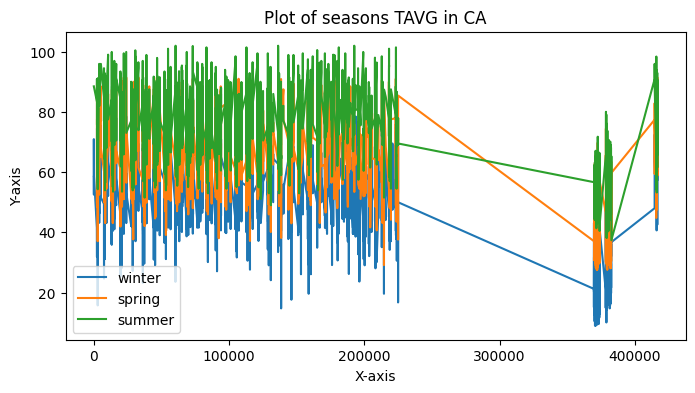

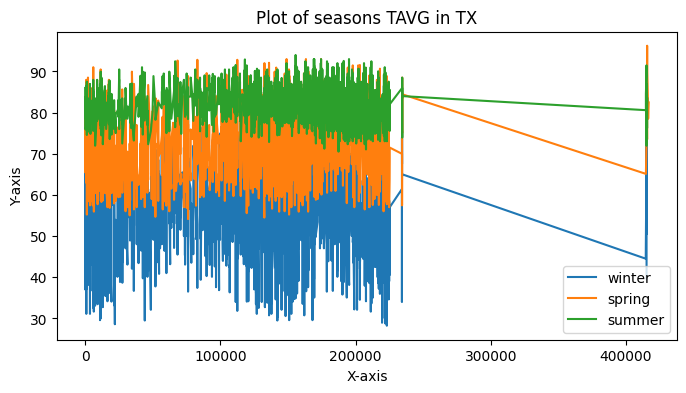

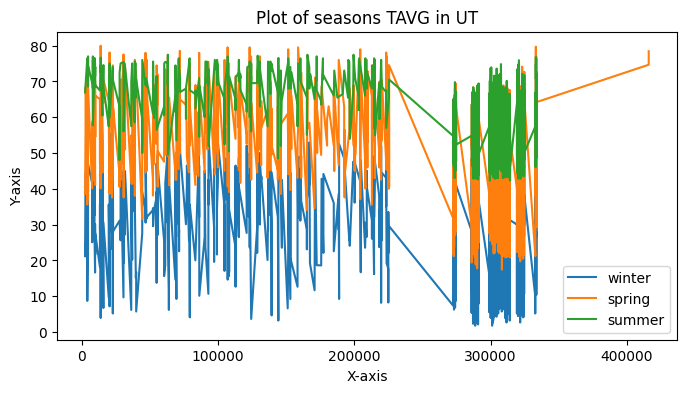

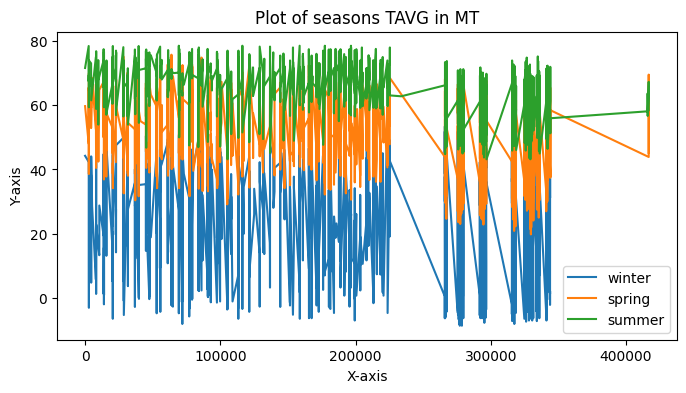

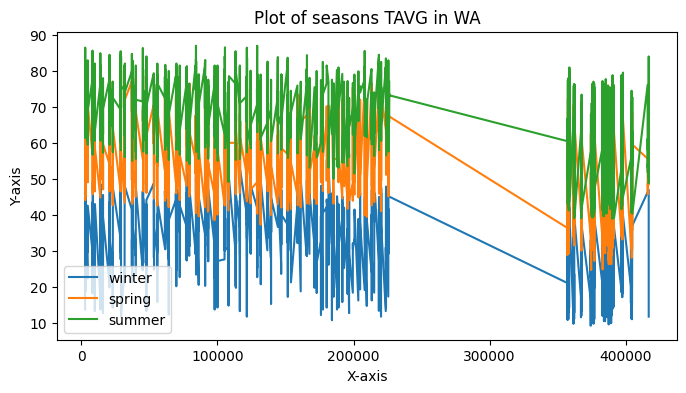

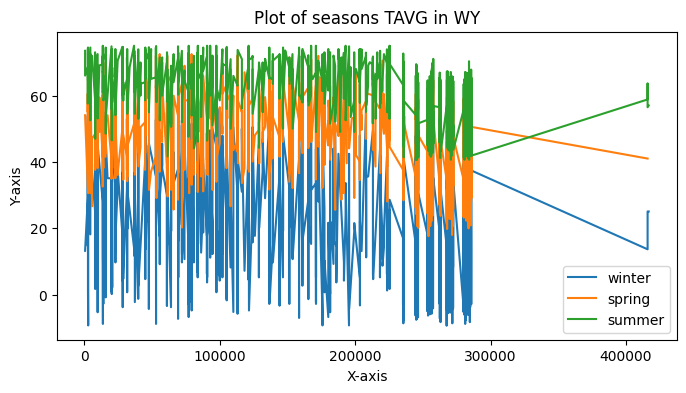

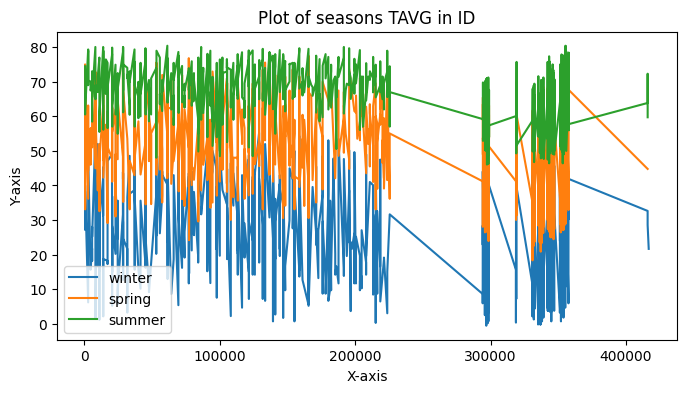

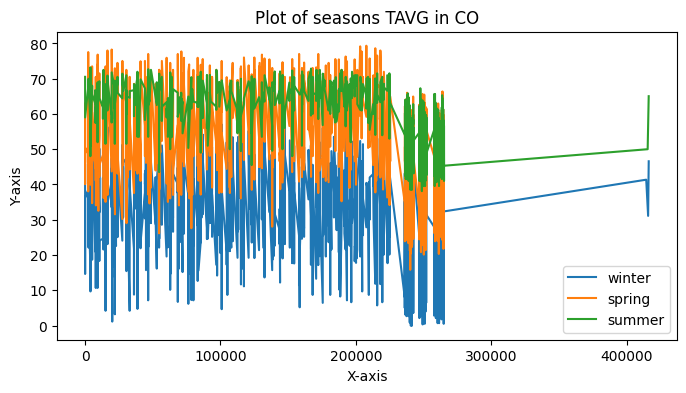

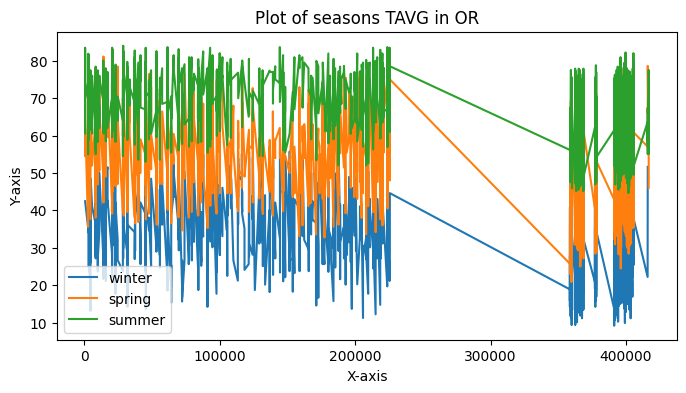

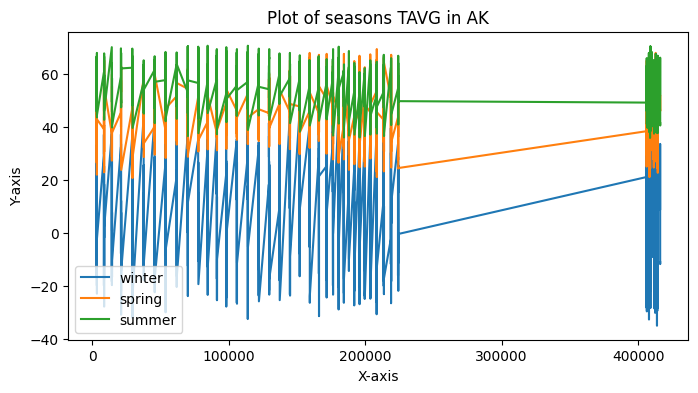

In [896]:
plt.figure(figsize=(12, 8))

for state in states:
    filtered_df = df[(df['state'] == state)]
    winter = filtered_df[(filtered_df['date'].dt.month.isin([1,2,3]))]
    spring = filtered_df[(filtered_df['date'].dt.month.isin([4,5,6]))]
    summer = filtered_df[(filtered_df['date'].dt.month.isin([7,8,9]))]
    plt.figure(figsize=(8, 4))
    plt.plot(winter['TAVG'], label='winter')
    plt.plot(spring['TAVG'], label='spring')
    plt.plot(summer['TAVG'], label='summer')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Plot of seasons TAVG in {}'.format(state))
    plt.legend()
    plt.show()

highest temp is in summer then in spring and the lowest temp is in winter

# What is the relationship between AWND and WSF5?

In [905]:
top_states = [ 'AK', 'WA', 'NY', 'MI', 'KS', 'PA', 'OH']

y_pred_ AK  =  1.4999661551178929  *  16.97701187258492  +  3.001083556686575


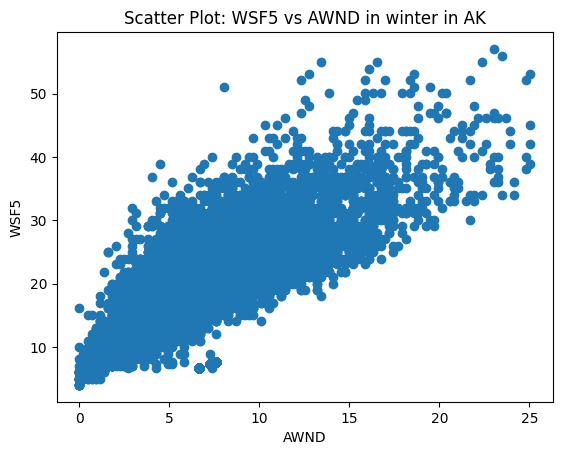

y_pred_ WA  =  2.117577239365449  *  16.97701187258492  +  -1.9307599766178747


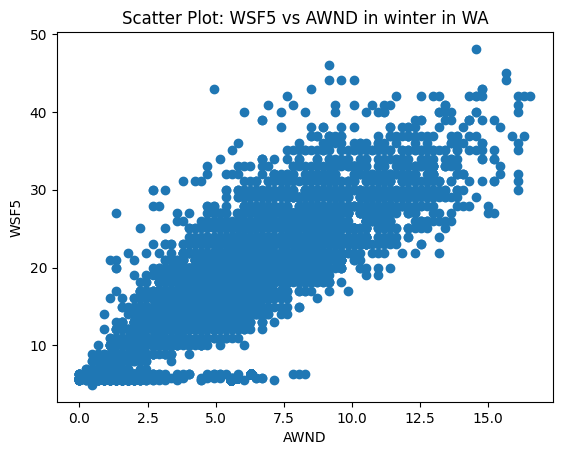

y_pred_ NY  =  1.78358611257039  *  16.97701187258492  +  10.542897486520483


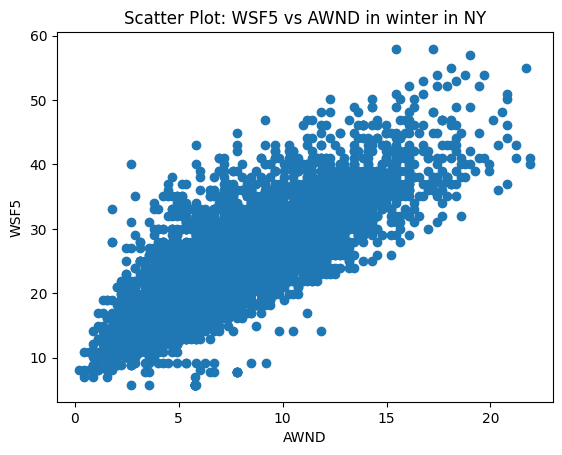

y_pred_ MI  =  1.7241405733122244  *  16.97701187258492  +  9.572288448246791


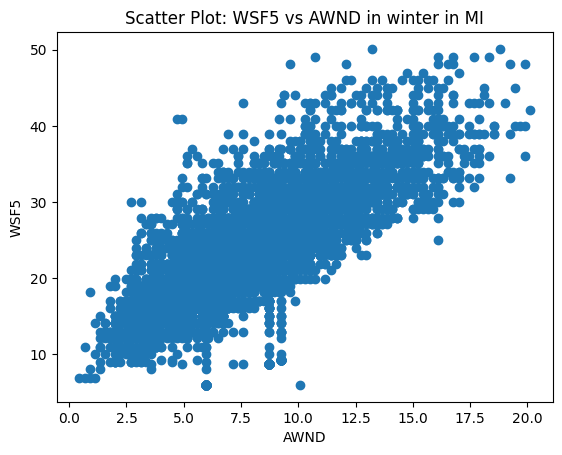

y_pred_ KS  =  1.6832529789796267  *  16.97701187258492  +  10.270818290504607


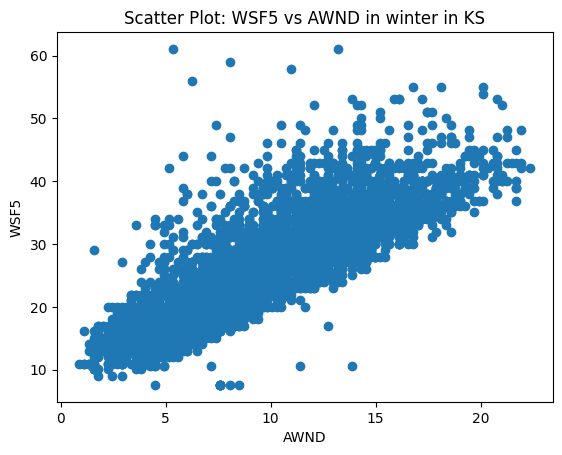

y_pred_ PA  =  1.920478430518055  *  16.97701187258492  +  10.220191608003766


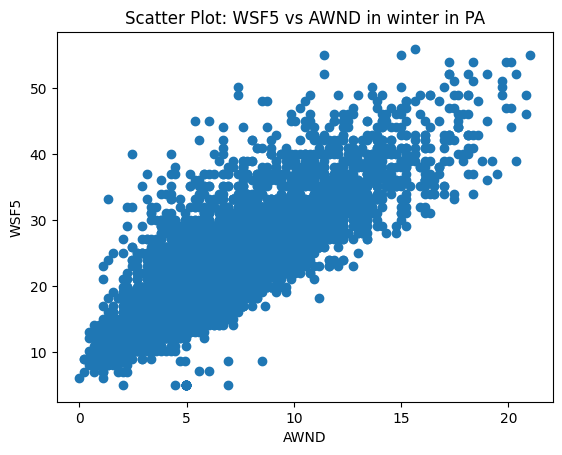

y_pred_ OH  =  1.7616960767208933  *  16.97701187258492  +  9.950315336616638


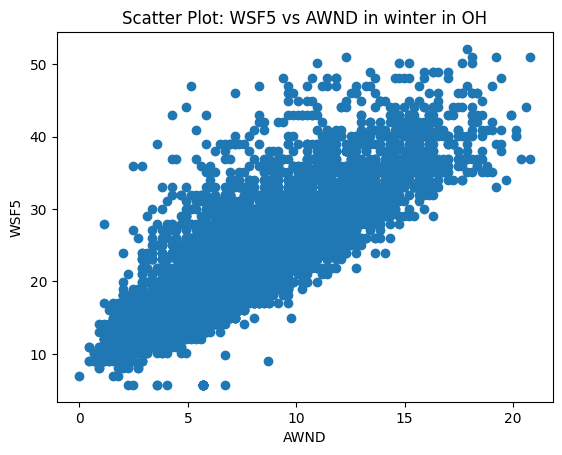

In [906]:
for state in top_states:
    
    
    filtered_df = df[(df['state'] == state)]
    df_clean = filtered_df.dropna(subset=['WSF5', 'AWND'])
    x = df_clean['AWND'].values
    y = df_clean['WSF5'].values
    slope, intercept = np.polyfit(x, y, 1)
    print('y_pred_', state,' = ',slope, ' * ', df['WSF5'].mean(), ' + ', intercept)
    plt.scatter(filtered_df['AWND'], filtered_df['WSF5'])
    plt.xlabel('AWND')
    plt.ylabel('WSF5')
    plt.title('Scatter Plot: WSF5 vs AWND in winter in {}'.format(state))
    plt.show()

positive linear relationship, the missing values can be found by applying the linear equation, and can use mean because data is centralized

# Is there a relationship between temperature (TAVG) and precipitation (PRCP)?

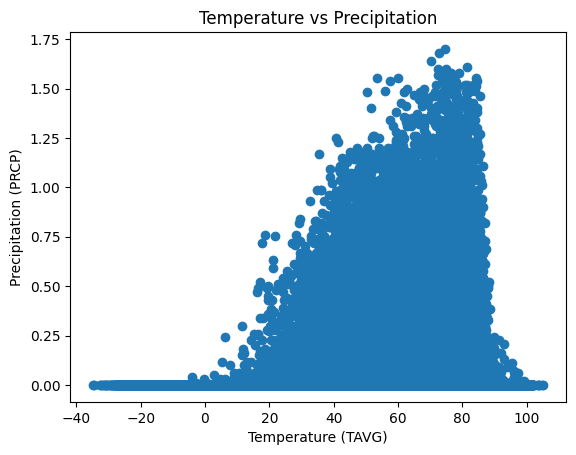

In [901]:
plt.scatter(df['TAVG'], df['PRCP'])
plt.xlabel('Temperature (TAVG)')
plt.ylabel('Precipitation (PRCP)')
plt.title('Temperature vs Precipitation')
plt.show()

There may be a relationship, but it's not linear

# conclusion

Dataset was about wethar in USA at Jan to Sep in 2017, it had many outliers and missing values, I dealt with the column within a state within a season, because there's many differences between states in USA 